# DATA SCIENCE PROJECT ON EARTHQUAKE PREDICTION


**TEAM CODE:** PTID-CDS-SEP-22-1377

**PROJECT CODE:** PRCP-1015-EquakDamagedPred

**DATA COLLECTION:** DATA PROVIDED BY DATAMITES FOR CAPSTONE PROJECT

## BUISNESS CASE: BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE LEVEL OF DAMAGE TO A BUILDING CAUSE BY DURING EARTHQUAKE

### IMPORT NECESSARY LIBRARY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.metrics import f1_score as score #Scoring metric for the competition
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# to avoid warnings
import warnings
warnings.filterwarnings("ignore")

### LOADING DATA

In [2]:
data_1 = pd.read_csv("train_values.csv")
data_2 = pd.read_csv("train_labels.csv")
data = pd.concat([data_1,data_2],axis=1)
pd.set_option("display.max_columns",None)
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,802906,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,28830,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,94947,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,590882,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,201944,3


In [3]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,802906,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,28830,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,94947,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,590882,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,201944,3


# DOMAIN ANALYIS

   The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.
   
   There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.
         
######  1. geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int):
           geographic region in which building exists, from largest(level 1) to most specific sub-region (level 3). Possible            values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.        

######  2. count_floors_pre_eq (type: int):
        number of floors in the building before the earthquake.

#####  3. age (type: int):
        age of the building in years.

######  4. area_percentage (type: int): 
         normalized area of the building footprint.

#####  5. height_percentage (type: int): 
         normalized height of the building footprint.

#####  6. land_surface_condition (type: categorical): 
         surface condition of the land where the building was built. Possible values: n, o, t.

#####  7. foundation_type (type: categorical): 
         type of foundation used while building. Possible values: h, i, r, u, w.

#####  8. roof_type (type: categorical):
         type of roof used while building. Possible values: n, q, x.

#####  9. ground_floor_type (type: categorical):
         type of the ground floor. Possible values: f, m, v, x, z.

#####  10. other_floor_type (type: categorical): 
         type of constructions used in higher than the ground floors (except of roof).Possible values: j, q, s, x.

#####  11. position (type: categorical):
         position of the building. Possible values: j, o, s, t.

#####  12. plan_configuration (type: categorical): 
         building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

#####  13. has_superstructure_adobe_mud (type: binary):
         flag variable that indicates if the superstructure was made of Adobe/Mud.

#####  14. position (type: categorical):
         position of the building. Possible values: j, o, s, t.

#####  15. plan_configuration (type: categorical): 
         building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

#####  16. has_superstructure_adobe_mud (type: binary): 
         flag variable that indicates if the superstructure was made of Adobe/Mud.

#####  17. has_superstructure_mud_mortar_stone (type: binary): 
         flag variable that indicates if the superstructure was made of Mud Mortar - Stone.

#####  18. has_superstructure_stone_flag (type: binary):
         flag variable that indicates if the superstructure was made of Stone.

#####  19. has_superstructure_cement_mortar_stone (type: binary): 
         flag variable that indicates if the superstructure was made of Cement Mortar - Stone.

#####  20. has_superstructure_mud_mortar_brick (type: binary): 
         flag variable that indicates if the superstructure was made of Mud Mortar - Brick.

#####  21. has_superstructure_cement_mortar_brick (type: binary):
         flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

#####  22. has_superstructure_timber (type: binary): 
         flag variable that indicates if the superstructure was made of Timber.

#####  23. has_superstructure_bamboo (type: binary): 
         flag variable that indicates if the superstructure was made of Bamboo.

#####  24. has_superstructure_rc_non_engineered (type: binary): 
         flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

#####  25. has_superstructure_rc_engineered (type: binary): 
         flag variable that indicates if the superstructure was made of engineered reinforced concrete.

#####  26. has_superstructure_other (type: binary): 
         flag variable that indicates if the superstructure was made of any other material.

#####  27. legal_ownership_status (type: categorical): 
         legal ownership status of the land where building was built. Possible values: a, r, v, w.

#####  28. count_families (type: int): 
         number of families that live in the building.

#####  29. has_secondary_use (type: binary): 
         flag variable that indicates if the building was used for any secondary purpose.

#####  30. has_secondary_use_agriculture (type: binary):
         flag variable that indicates if the building was used for agricultural purposes.

#####  31. has_secondary_use_hotel (type: binary): 
         flag variable that indicates if the building was used as a hotel.

#####  32. has_secondary_use_rental (type: binary):
         flag variable that indicates if the building was used for rental purposes.

#####  33. has_secondary_use_institution (type: binary):
         flag variable that indicates if the building was used as a location of any institution.

#####  34. has_secondary_use_school (type: binary):
         flag variable that indicates if the building was used as a school.

#####  35. has_secondary_use_industry (type: binary): 
         flag variable that indicates if the building was used for industrial purposes.

#####  36. has_secondary_use_health_post (type: binary): 
         flag variable that indicates if the building was used as a health post.

#####  37. has_secondary_use_gov_office (type: binary):
         flag variable that indicates if the building was used fas a government office.

#####  38. has_secondary_use_use_police (type: binary): 
         flag variable that indicates if the building was used as a police station.

#####  39. has_secondary_use_other (type: binary):
          flag variable that indicates if the building was secondarily used for other purposes.
   



         

### BASIC CHECKS

In [4]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,802906,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,28830,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,94947,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,590882,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,201944,3


In [5]:
data.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,688636,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,669485,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,602512,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,151409,2
260600,747594,21,9,9101,3,10,7,6,n,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,3,0,0,0,0,0,0,0,0,0,0,0,747594,3


In [6]:
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [7]:
data.shape

(260601, 41)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 41 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

### STATISTICAL MEASURES OF DATA

In [9]:
data.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,2.606010e+05,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,5.256755e+05,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,3.045450e+05,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.611900e+05,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.257570e+05,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.897620e+05,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.052934e+06,3.000000


In [10]:
data.describe(include='O')

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


# EXPLOTARY DATA ANALYSIS

### UNIVARIATE ANALYSIS

In [12]:
univariate_data = data[[ 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other', 'damage_grade']]

In [ ]:
import sweetviz as sv 
my_report = sv.analyze(univariate_data)
my_report.show_html()

### BIVARIATE ANALYSIS

### ANALYSIS ON CATEGORICAL FEATURES WITH RESPECT TO TARGET VERIABLE (DAMAGE_GRADE)

The output below shows the non-numeric fields in our datatype which python has recorded as type object. These variables will be explored in turn to understand how they relate to the damage grade classification.

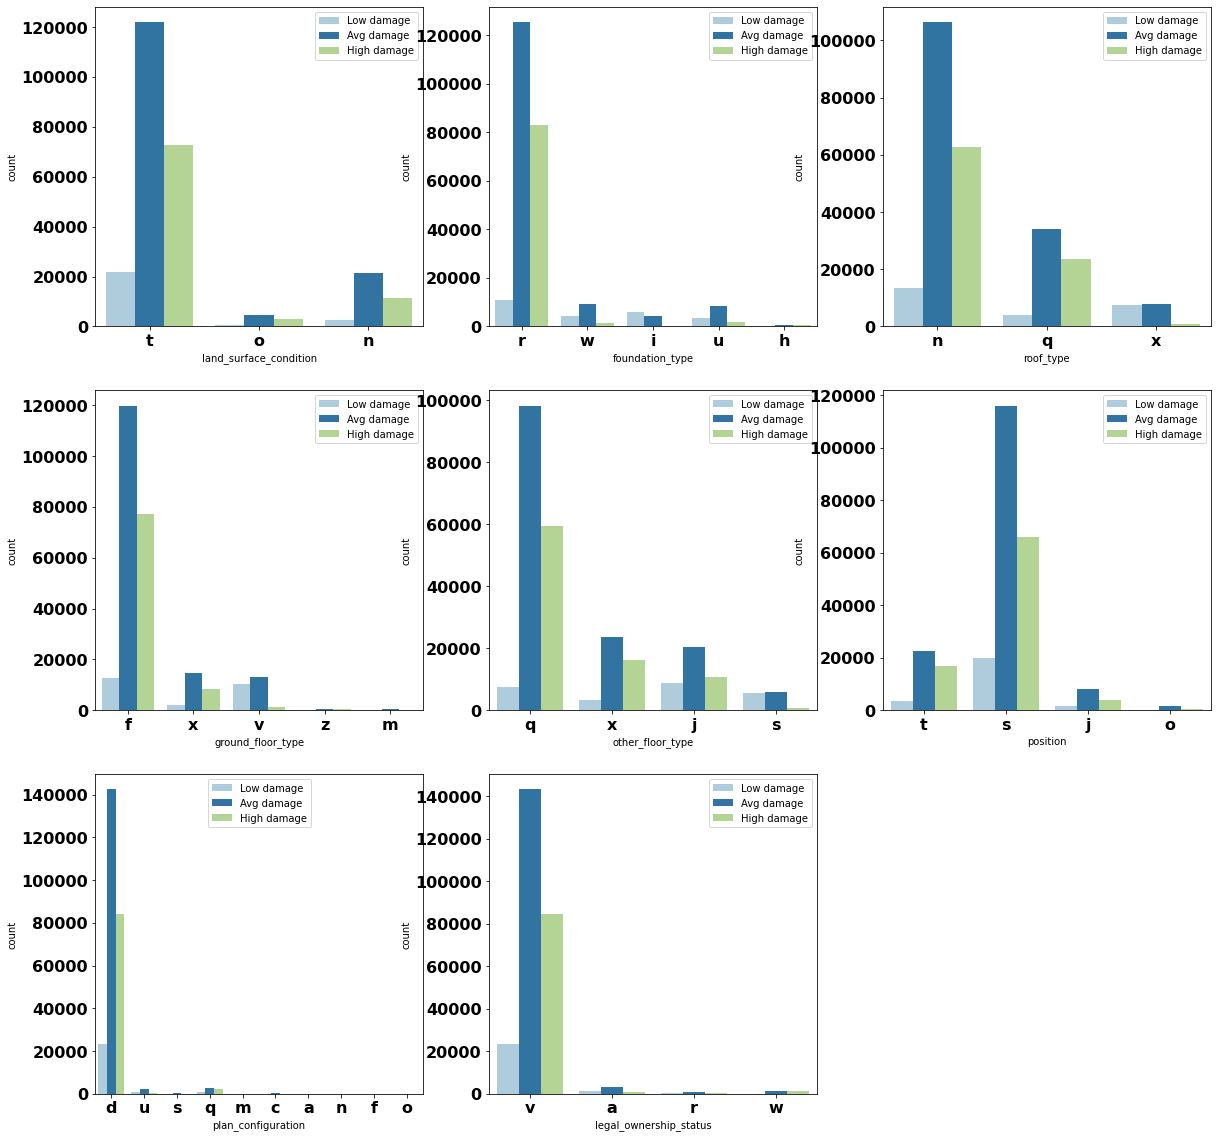

In [14]:
cat_cols=data.select_dtypes(include="object")
font={'weight' : 'bold',
        'size': 16}       
q=1
plt.figure(figsize=(20,20))
for i in cat_cols:
    plt.subplot(3,3,q)
    ax=sns.countplot(data[i].dropna(),palette="Paired",hue=data["damage_grade"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(i)
    plt.legend(["Low damage","Avg damage","High damage"])
    q+=1
plt.show()

## OBSERVATION : -

###  land_surface_condition :-

* The plot is converted to show how each grade is distributed amongst the three land surface conditions. 
* In all cases the frequency of damage is not correlated with the label of the damage.
* 't'  type of land_surface_condition is the leading type of land_surface_condition found in most of the Avg_damaged buildings

### foundation_type

*  'r' type of foundation is the leading type of foundation found in most of the Avg_damaged buildings.
*  The proportion of damage Low and Avg is much closer for buildings on 'w' and 'u' foundation_type group, but much more evenly    spaced out for building on a 'i' foundation_type.
*  There are 5 entries in the foundation type, with the 'h' foundation type  being a grouping of less popular Damage. 


### roof_type : -

*  According to the roof type variable there are three different types of roof. The vast majority of buildings have the 'n'        roof, but there are still over 200k buildings with 'q' and just over 5k with 'x'.
*  In 'n' and 'q' cases the frequency of damage is correlated with the label of the damage.
*  'n'  type of roof is the leading type of roof found in most of the Avg_damaged buildings
*  The spread of building between roof type and Damage is quite similar for the types with 'n' and 'q' roof type.
*  Roof type 'x' actually is most commonly associated with Damage Low and then Avg.

### ground_floor_type:-

*  There are 5 entries in the ground floor type, with the 'z' and 'm' ground floor type being a grouping of less popular Damage. 
*  ' f ' type of ground floor is the leading type of ground floor found in most of the Avg_damaged buildings


### other_floor_type

*  If the other_floor_type is q the chance of damage_grade is less but q other_floor_type are also chance of damage_grade.
*  x,j, and s other_floor_type are more(high) chance damage_grade
*  other floor type 's' actually is most commonly associated with Damage Low and then Avg.
*  In 'x' and 'j' cases the frequency of damage is correlated with the label of the damage.


### position :-

* The association between position and damage grade of buildings differ less when compared with 'o' and buildings with other       position ('t','s','j') on one-side.
* 's'  type of position is the leading type of position found in most of the Avg_damaged buildings.
*  There are 4 entries in the position, with the 'o' position  being a grouping of less popular Damage. 


### plan_configuration :-

* 'd' type of plan configuration is the leading type of plan configuration found in most of the Avg_damaged buildings
*  There are 10 entries in the plan configuration, with the 's','m','a','n','f' and 'o' plan configuration  being a grouping of    less popular Damage.
*  The most popular type of plan configuration is 'd', followed by 'q' and then 'u'.


### legal_ownership_status

*  There are 4 entries in the legal ownership status, with the 'a','r' and 'w' legal ownership status  being a grouping of less     popular Damage.
*  ' f ' type of legal ownership status is the leading type of legal ownership status found in most of the Avg_damaged buildings
*  legal ownership status 'w' actually is most commonly associated with Damage High and then Avg.


### ANALYSIS ON NUMERICAL VERIABLE WITH RESPECT TO TARGET VERIBLE (DAMAGE_GRADE)


In [21]:
numerical_col = data[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other','count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]

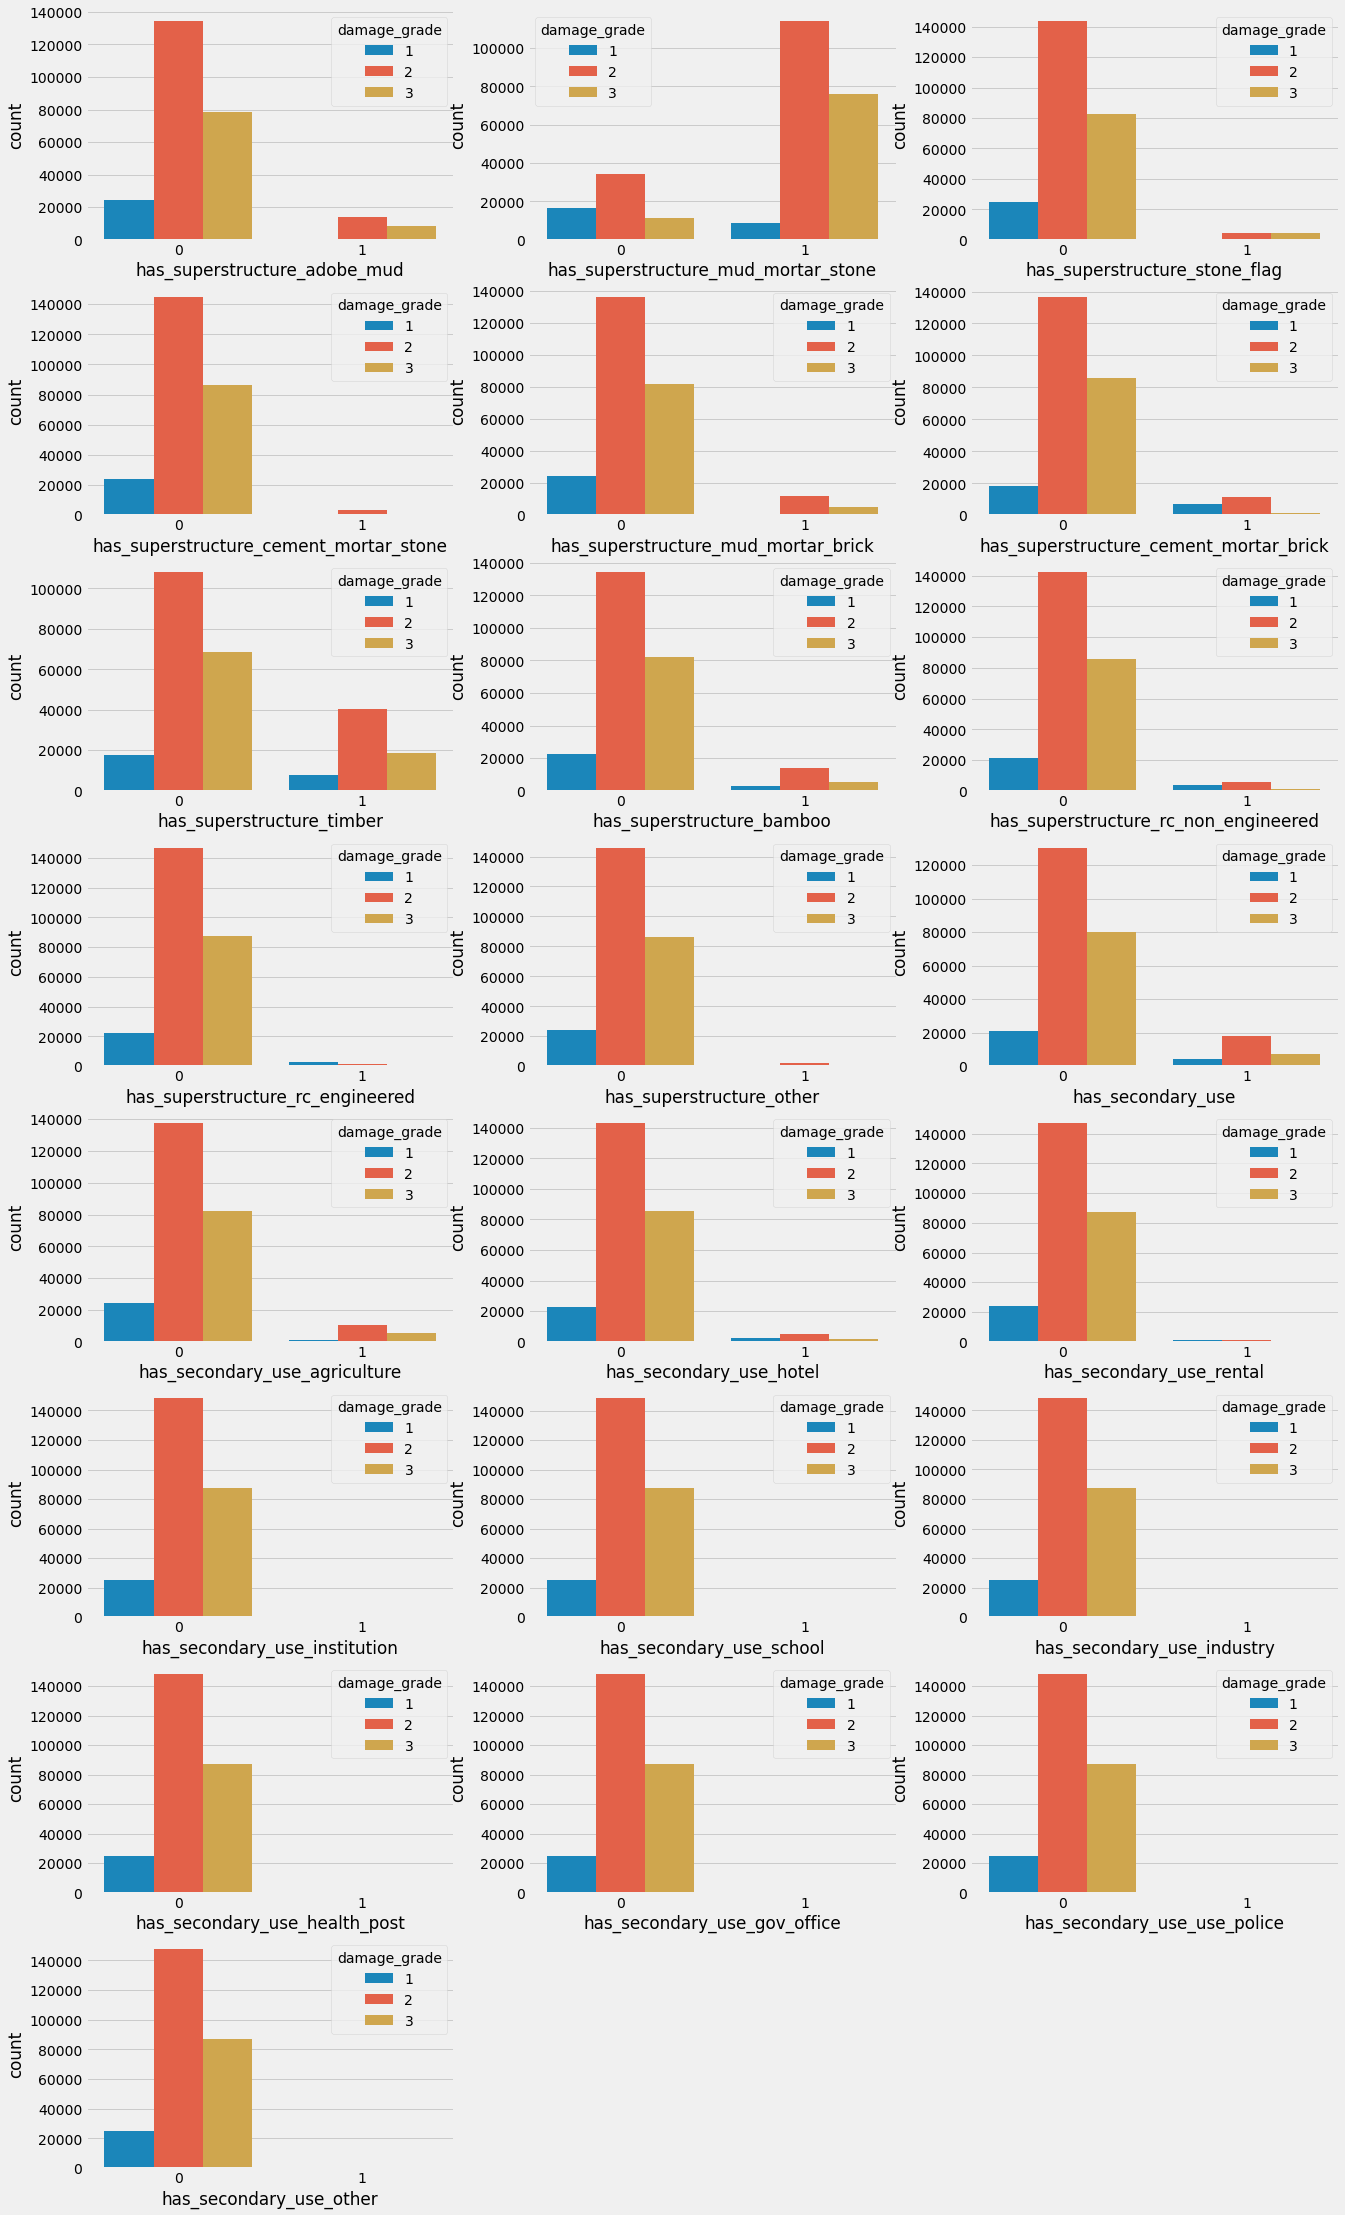

In [23]:
#numerical_col = data.columns[data.columns.str.startswith('has')]

def countPlot(numerical_col):
  plt.rcParams['font.size'] = 18
  plt.style.use('fivethirtyeight')
  fig = plt.figure(figsize=(20,37))
  for i,txt in enumerate(numerical_col):
    ax = fig.add_subplot(8,3,i+1)
    sns.countplot(x=data[txt], ax=ax, hue=data['damage_grade'])
  plt.show()
countPlot(numerical_col)

### OBSERVATION :-

*   1. Top 5 types of structures those got damaged the most were made up of timber, bamboo and some form of mud.

*   2. stone_flag, cement_mortar_stone and rc_engineered type were affected the least. 
       This show that these buildings either withheld the earthquake well or they were far away from the epicenter.
       
*   3. All binary columns have more zero than 1, except has_superstructure_cement_mortar_stone.

*   4. In some columns there seems having only single value like all 0's, need to check.   

### MULTIVARIATE ANALYSIS

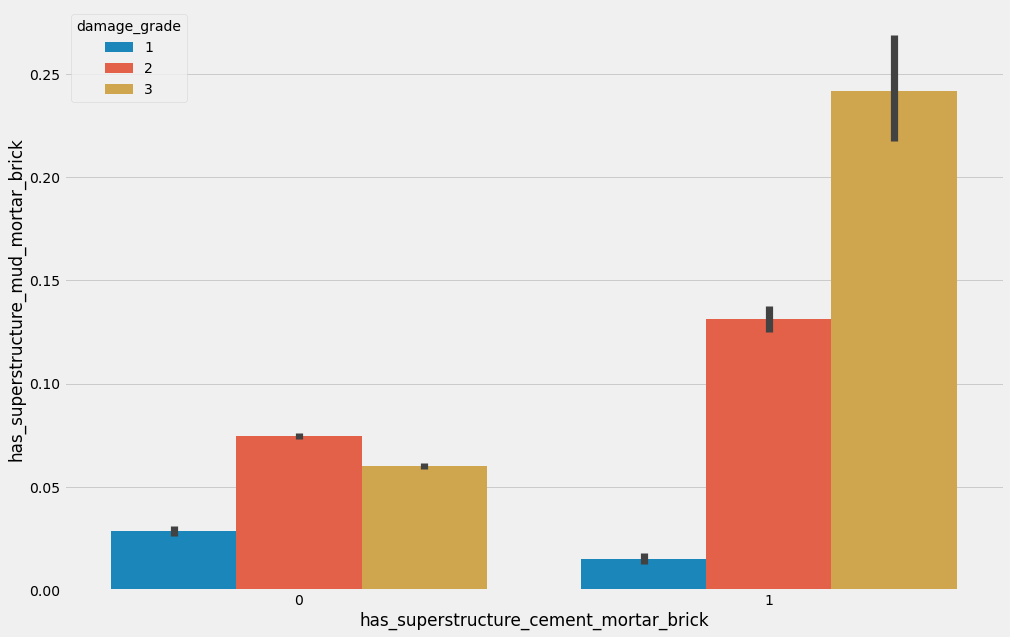

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x='has_superstructure_cement_mortar_brick',y='has_superstructure_mud_mortar_brick',hue=data.damage_grade,data=data)
plt.show()

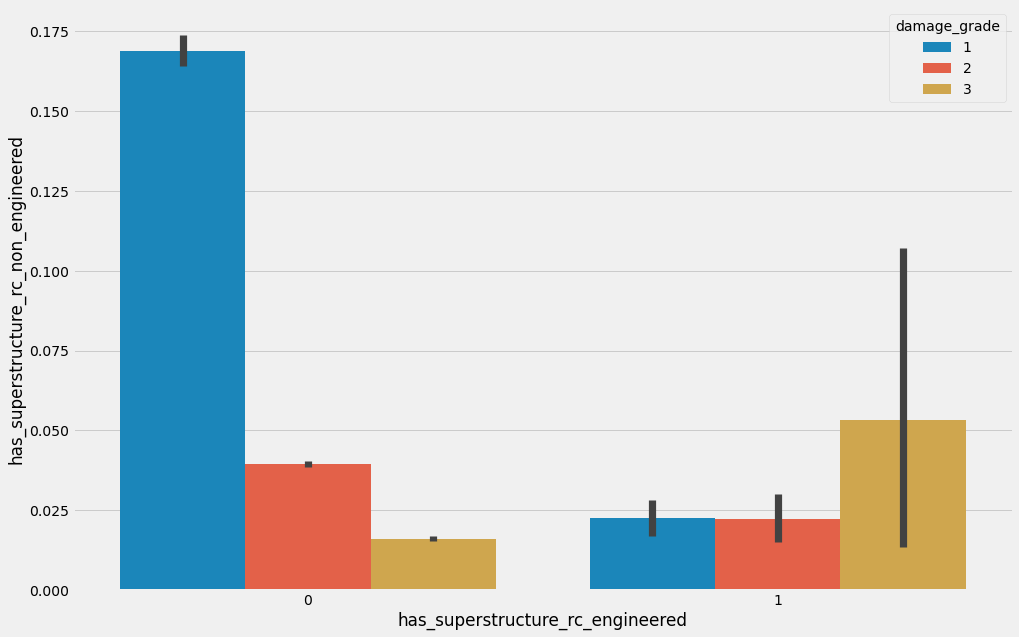

In [26]:
plt.figure(figsize=(15
                    ,10))
sns.barplot(x='has_superstructure_rc_engineered' ,y='has_superstructure_rc_non_engineered',hue=data.damage_grade,data=data)
plt.show()

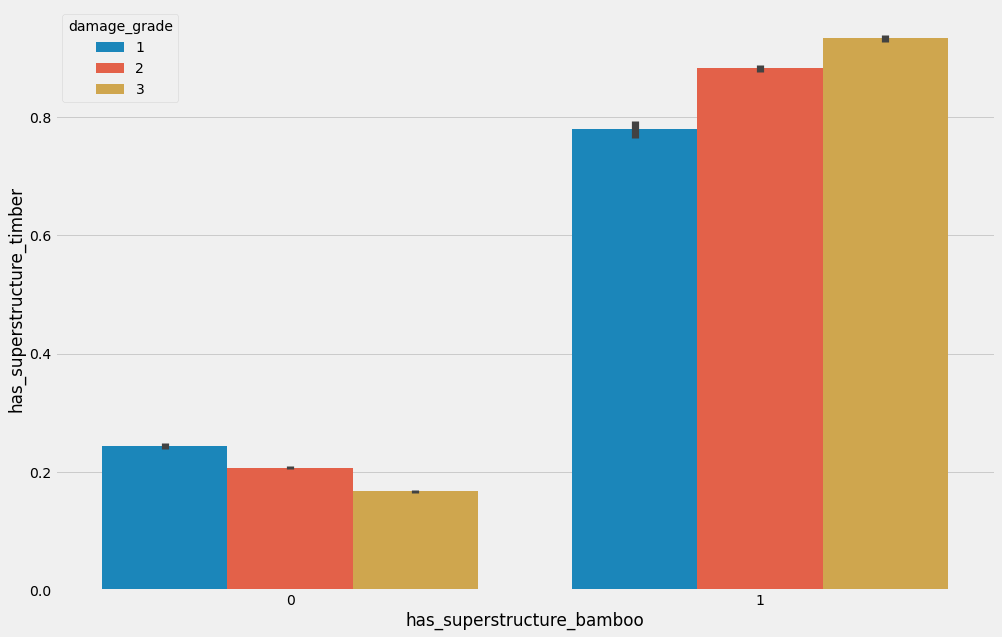

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x='has_superstructure_bamboo' ,y='has_superstructure_timber',hue=data.damage_grade,data=data)
plt.show()

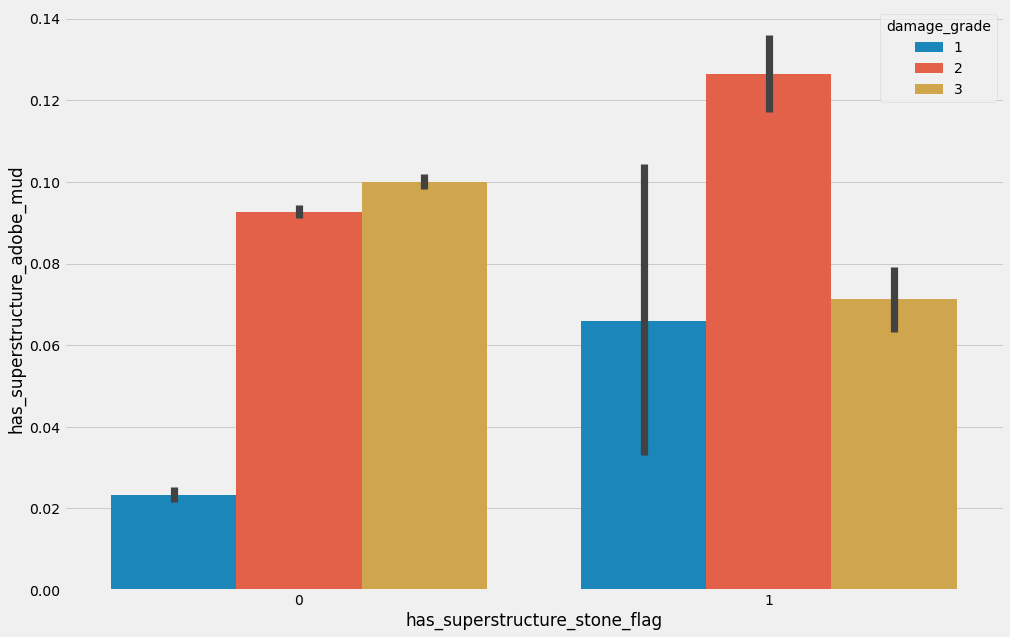

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x='has_superstructure_stone_flag' ,y='has_superstructure_adobe_mud',hue=data.damage_grade,data=data)
plt.show()

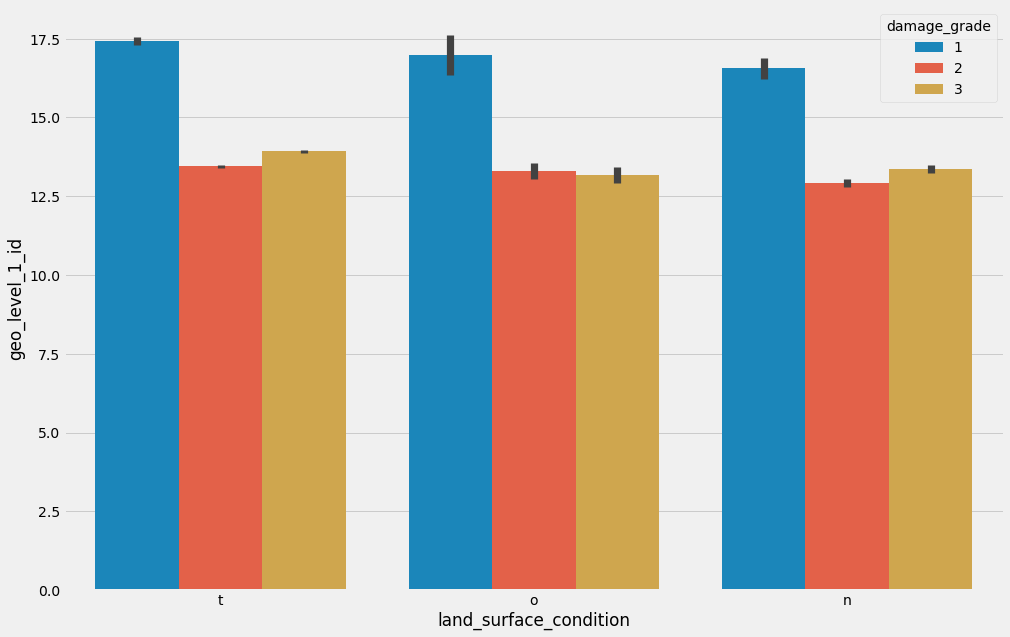

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(x='land_surface_condition' ,y='geo_level_1_id',hue=data.damage_grade,data=data)
plt.show()

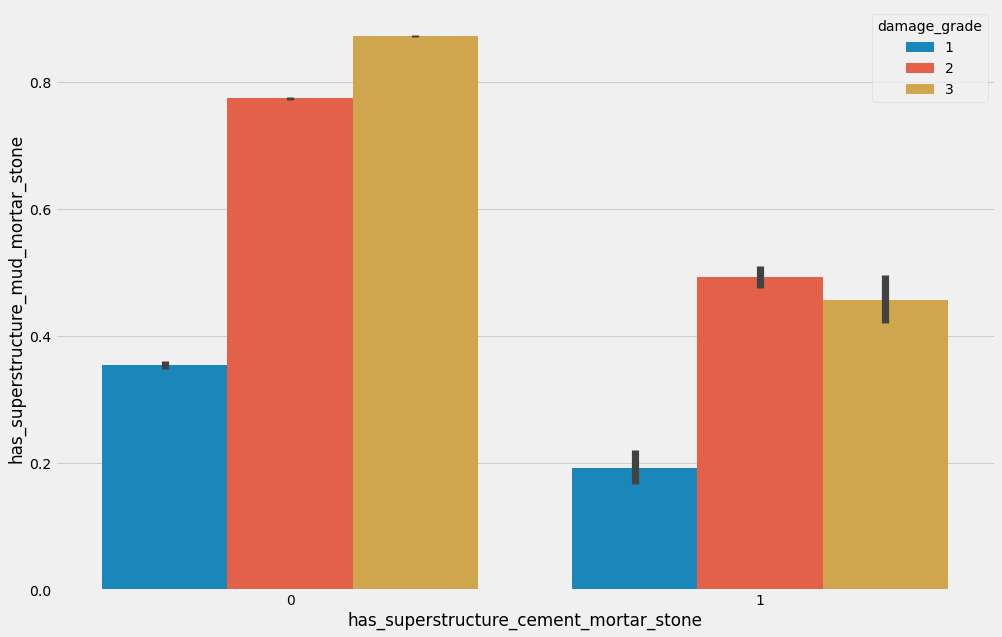

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x='has_superstructure_cement_mortar_stone' ,y='has_superstructure_mud_mortar_stone',hue=data.damage_grade,data=data)
plt.show()

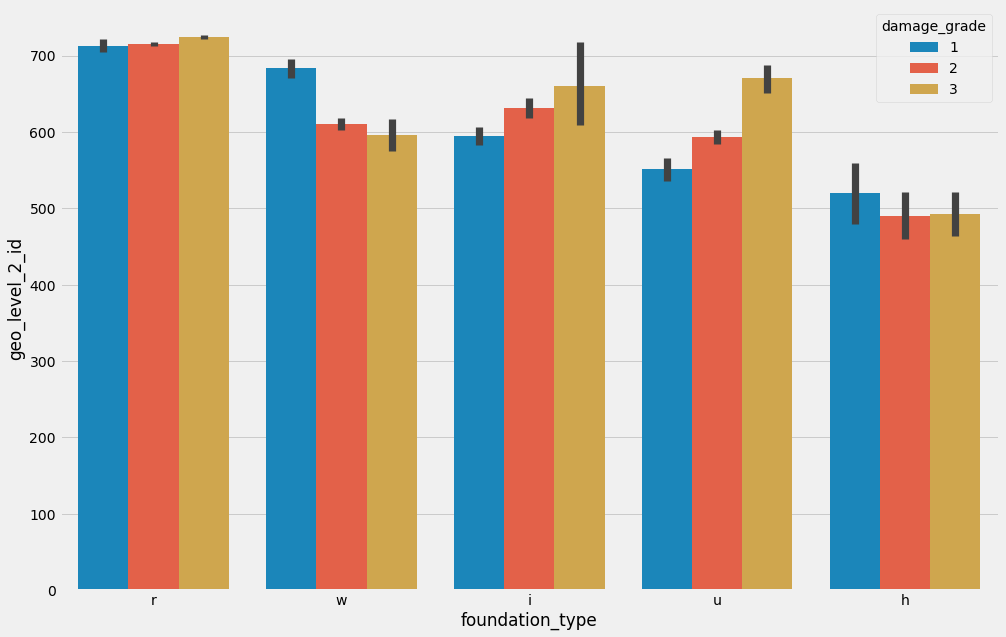

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x='foundation_type' ,y='geo_level_2_id',hue=data.damage_grade,data=data)
plt.show()

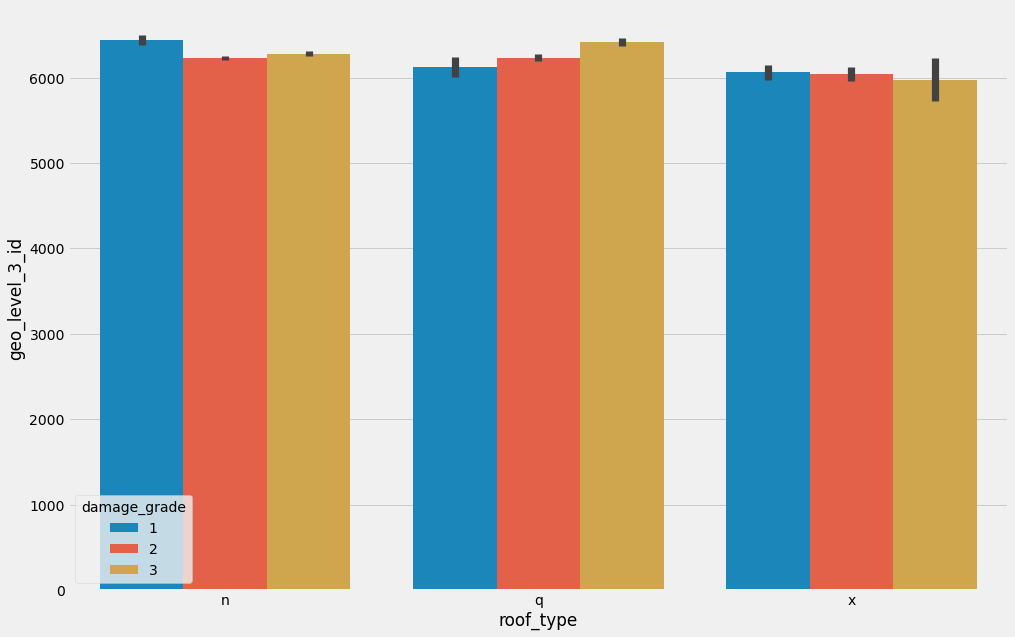

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(x='roof_type' ,y='geo_level_3_id',hue=data.damage_grade,data=data)
plt.show()

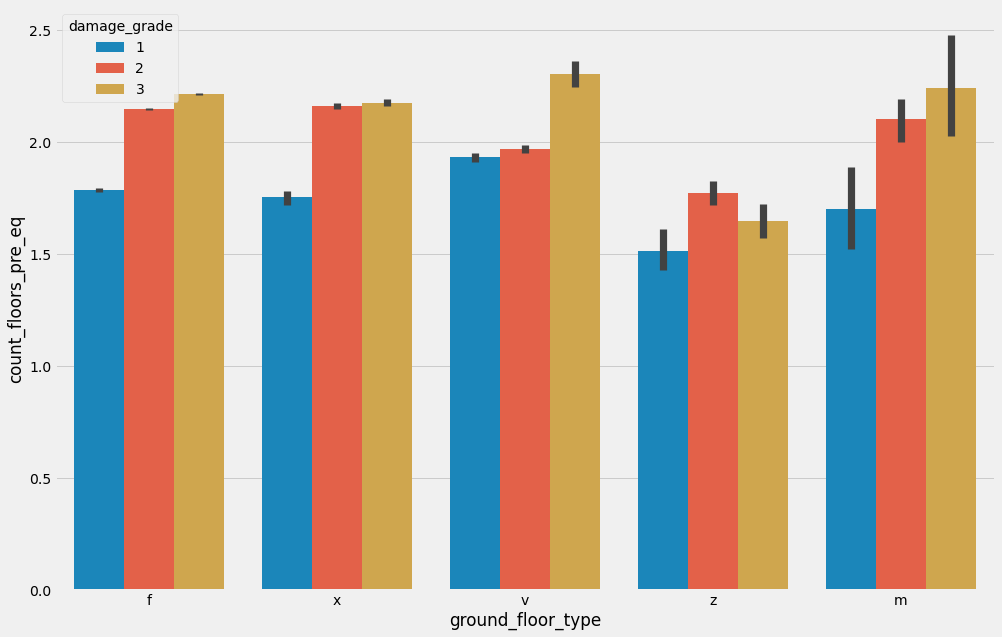

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(x='ground_floor_type' ,y='count_floors_pre_eq',hue=data.damage_grade,data=data)
plt.show()

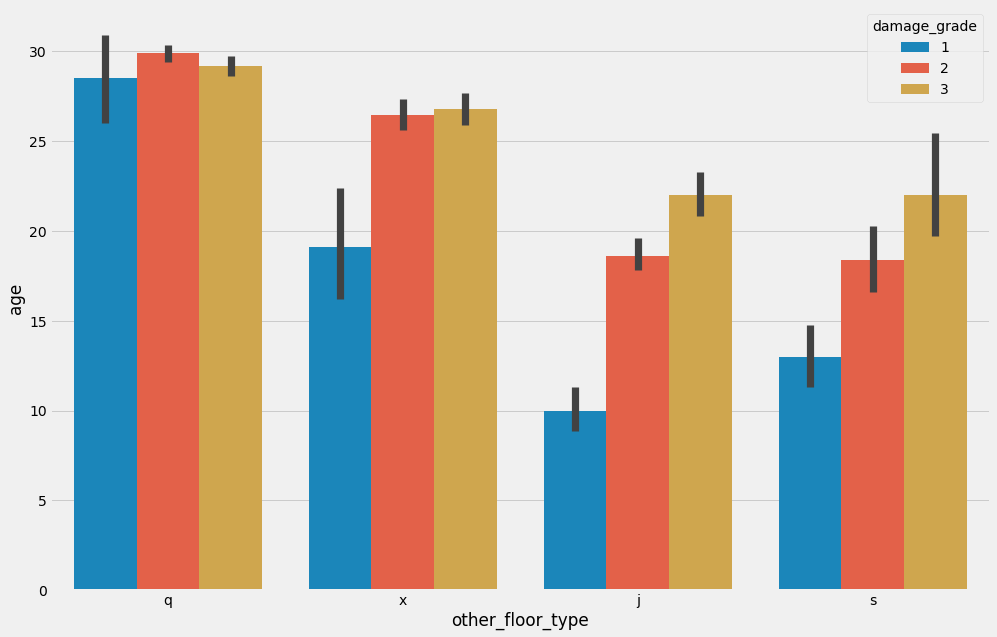

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(x='other_floor_type' ,y='age',hue=data.damage_grade,data=data)
plt.show()

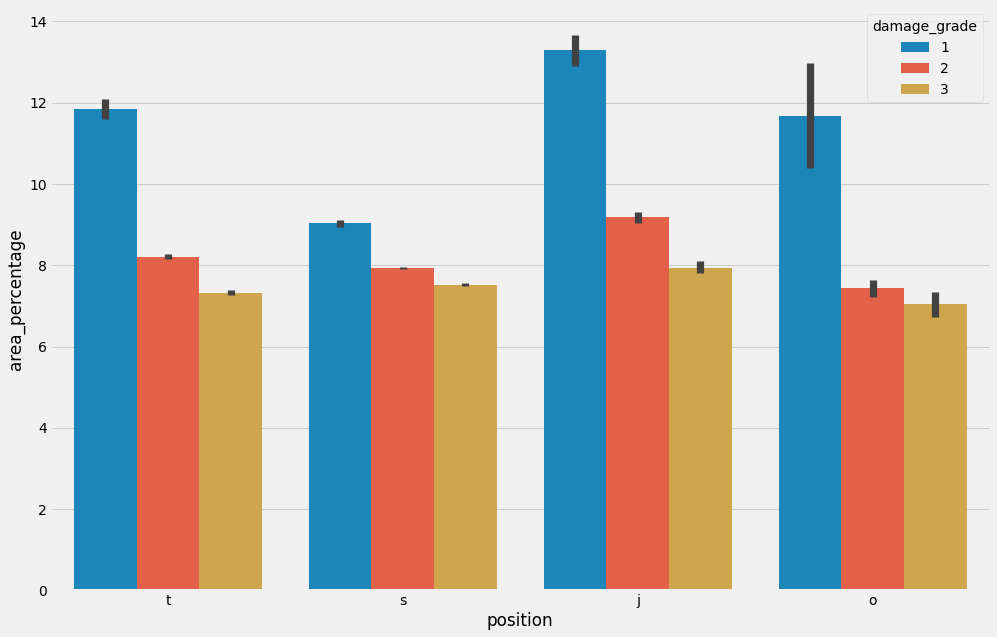

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(x='position' ,y='area_percentage',hue=data.damage_grade,data=data)
plt.show()

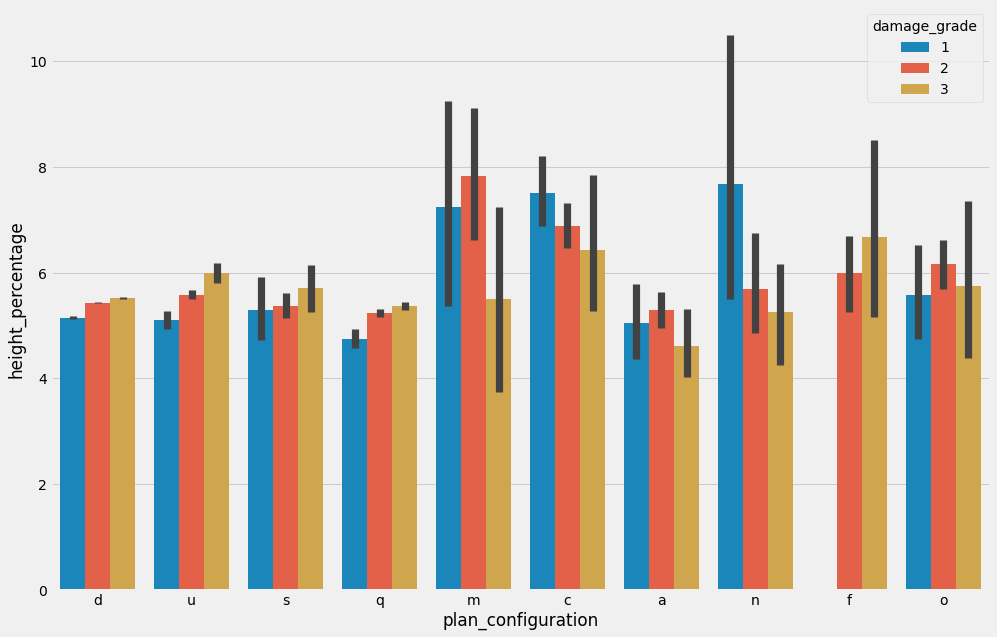

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(x='plan_configuration' ,y='height_percentage',hue=data.damage_grade,data=data)
plt.show()

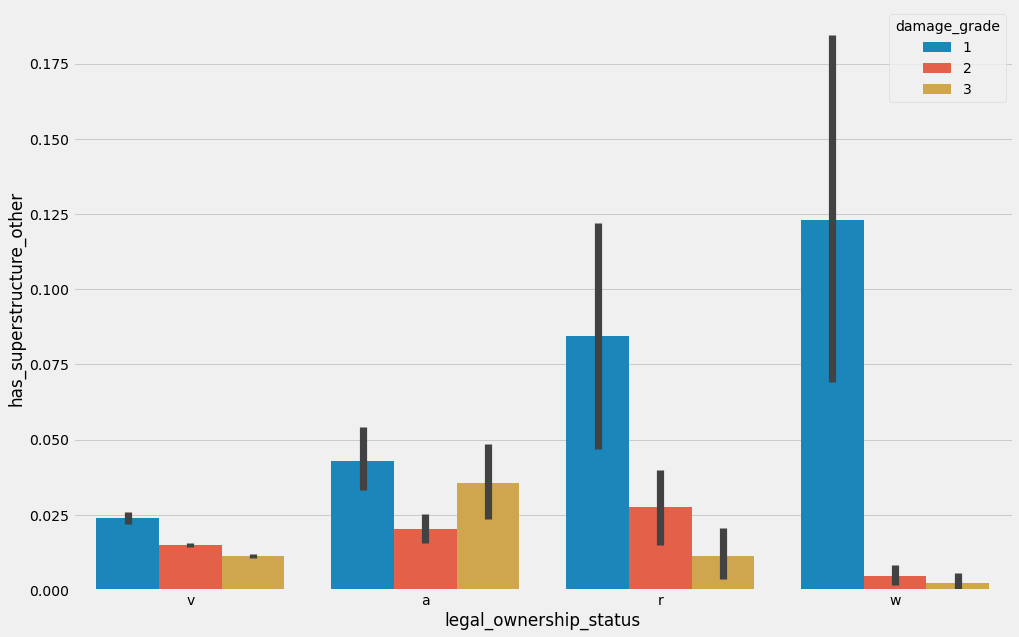

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(x='legal_ownership_status' ,y='has_superstructure_other',hue=data.damage_grade,data=data)
plt.show()

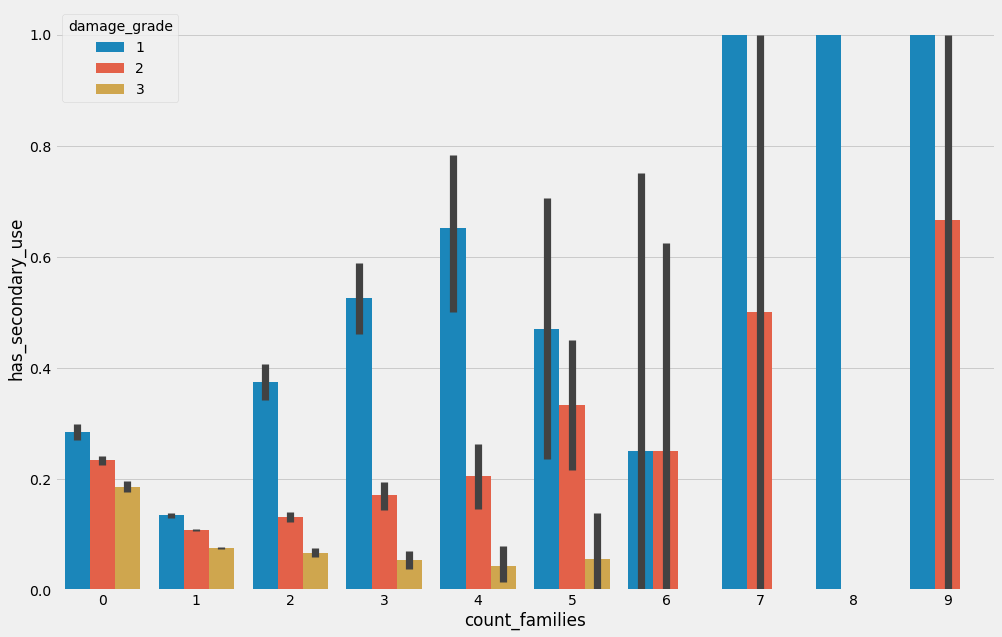

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(x='count_families' ,y='has_secondary_use',hue=data.damage_grade,data=data)
plt.show()

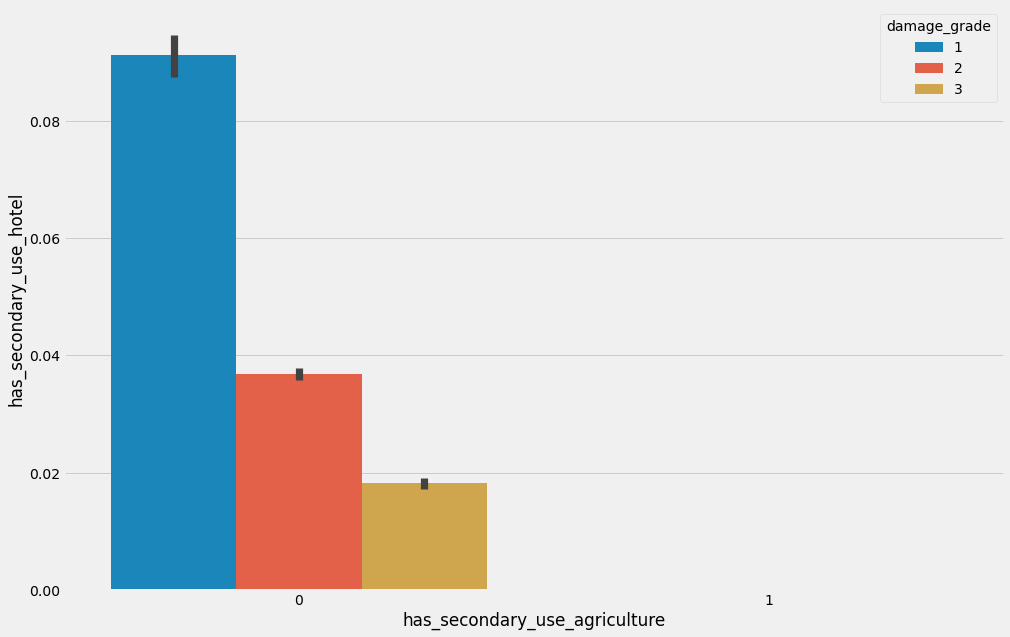

In [39]:
plt.figure(figsize=(15,10))
sns.barplot(x='has_secondary_use_agriculture' ,y='has_secondary_use_hotel',hue=data.damage_grade,data=data)
plt.show()

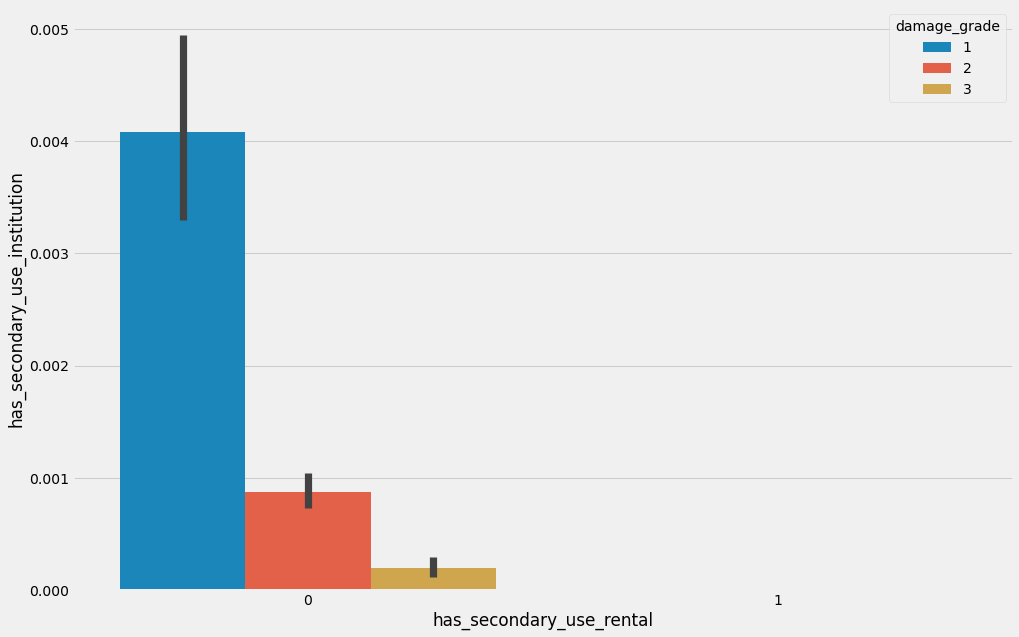

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(x='has_secondary_use_rental' ,y='has_secondary_use_institution',hue=data.damage_grade,data=data)
plt.show()

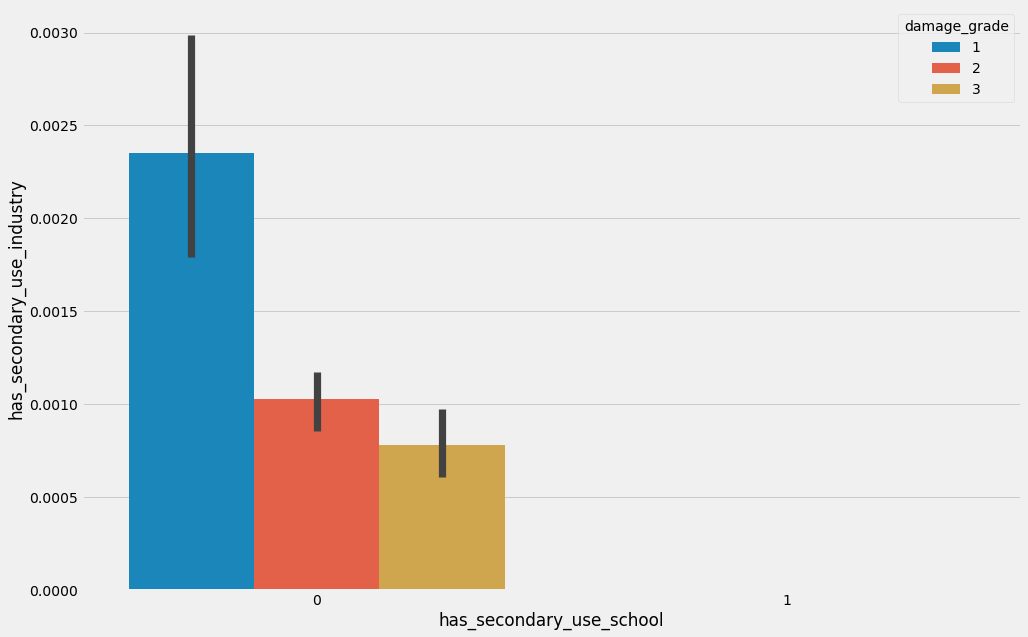

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(x='has_secondary_use_school' ,y='has_secondary_use_industry',hue=data.damage_grade,data=data)
plt.show()

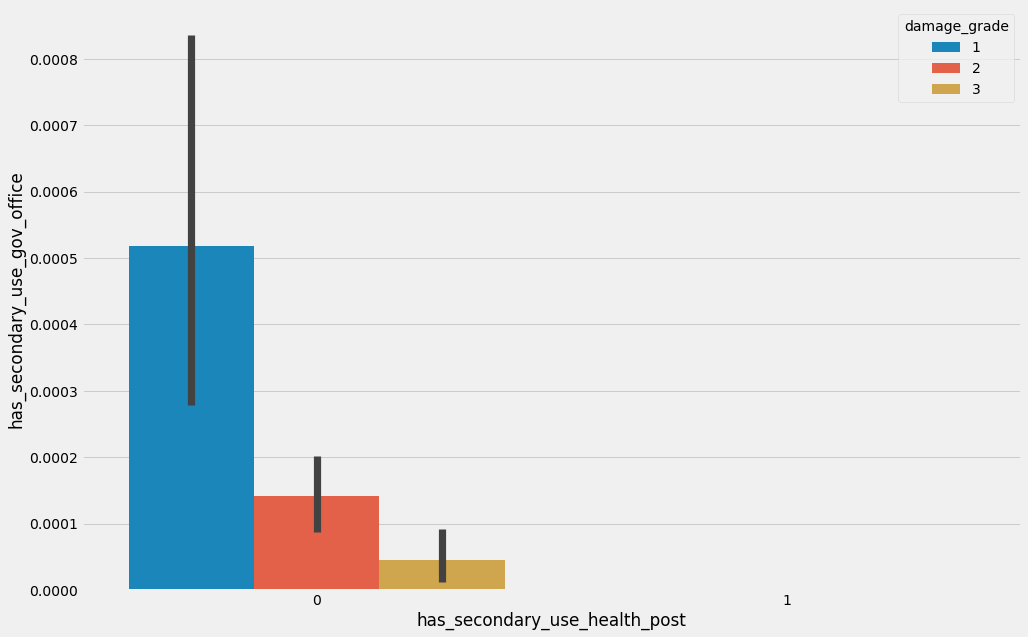

In [42]:
plt.figure(figsize=(15,10))
sns.barplot(x='has_secondary_use_health_post' ,y='has_secondary_use_gov_office',hue=data.damage_grade,data=data)
plt.show()

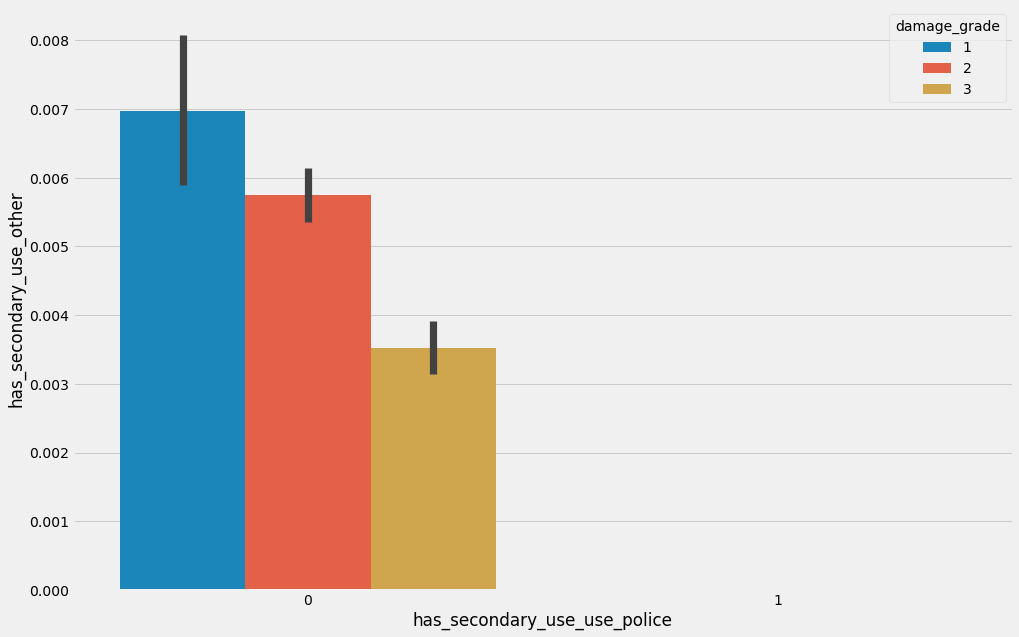

In [43]:
plt.figure(figsize=(15,10))
sns.barplot(x='has_secondary_use_use_police' ,y='has_secondary_use_other',hue=data.damage_grade,data=data)
plt.show()

# Data Preprocessing and Feature Engineering

### 1.CHECK MISSING VALUE

In [44]:
data.isnull().sum()


building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

   * Their is no missing value in data

## 2.CATEGORICAL DATA CONVERSION

### Label Encoding.

*  ML algorithm dont process with object type data so we have to convert object type data into numerical type data

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data.land_surface_condition=label.fit_transform(data.land_surface_condition)
data.foundation_type=label.fit_transform(data.foundation_type)
data.roof_type=label.fit_transform(data.roof_type)
data.ground_floor_type=label.fit_transform(data.ground_floor_type)
data.other_floor_type=label.fit_transform(data.other_floor_type)
data.position=label.fit_transform(data.position)
data.plan_configuration=label.fit_transform(data.plan_configuration)
data.legal_ownership_status=label.fit_transform(data.legal_ownership_status)

In [15]:
data.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id,damage_grade
0,802906,6,487,12198,2,30,6,5,2,2,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,802906,3
1,28830,8,900,2812,2,10,8,7,1,2,0,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,28830,2
2,94947,21,363,8973,2,10,5,5,2,2,0,0,3,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,94947,3
3,590882,22,418,10694,2,10,6,5,2,2,0,0,3,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,590882,2
4,201944,11,131,1488,3,30,8,9,2,2,0,0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,201944,3
5,333020,8,558,6089,2,10,9,5,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,333020,2
6,728451,9,475,12066,2,25,3,4,0,2,0,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,728451,3
7,475515,20,323,12236,2,0,8,6,2,4,1,2,3,2,9,0,0,0,0,0,1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,475515,1
8,441126,0,757,7219,2,15,8,6,2,2,1,0,1,2,2,0,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,441126,2
9,989500,26,886,994,1,0,13,4,2,1,0,2,0,2,2,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,989500,1


# CHECK OUTLIERS AND IMPUTE OUTLIERS:

In [16]:
num_data =data[['area_percentage', 'age','height_percentage']]

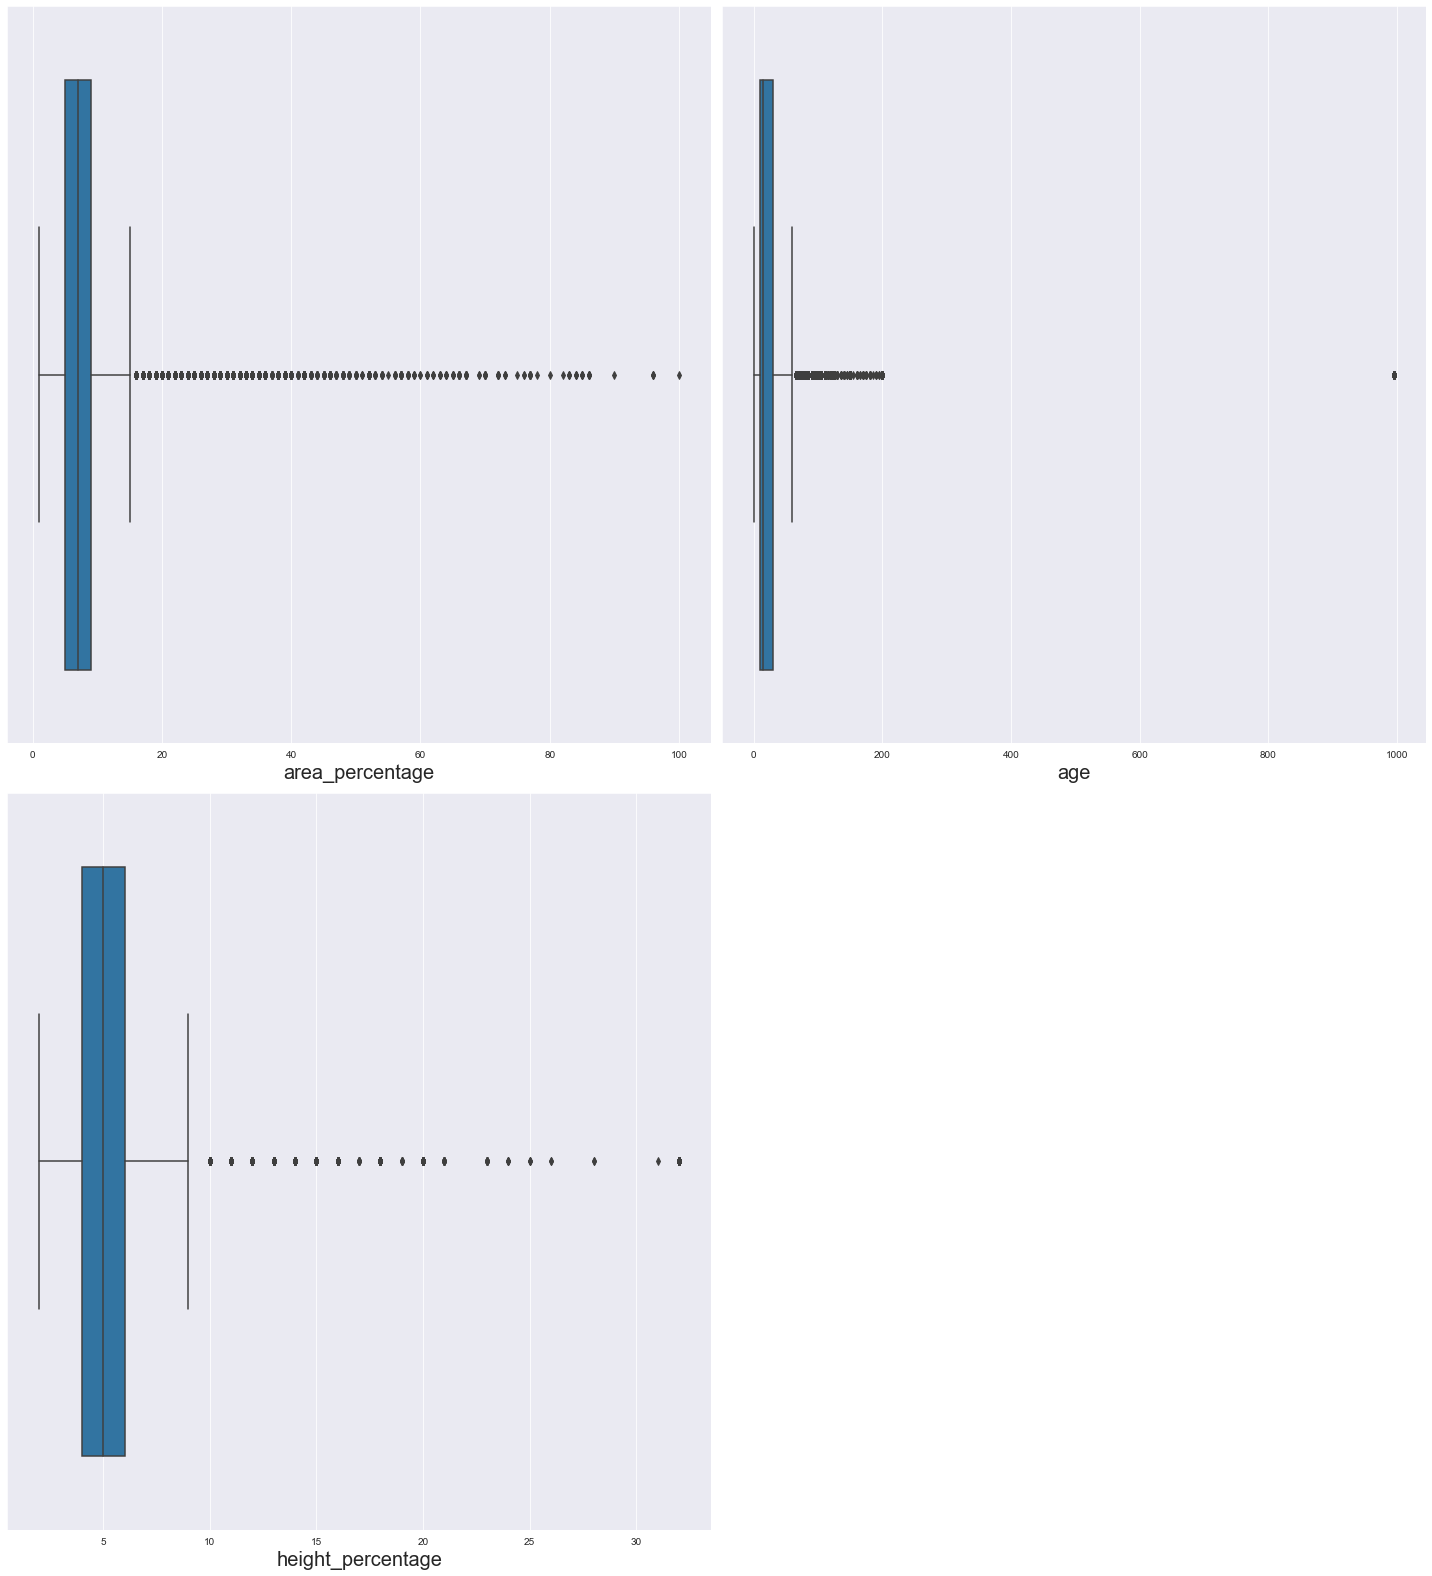

In [17]:

sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in num_data: # iteration of columns / acessing the columns from  dataset 
    if plotno<=5:    # set the limit
        plt.subplot(2,2,plotno) # # plotting 5 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.boxplot(x= num_data[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### CHECKING THE DISTRIBUTION BEFORE HANDLE THE OUTLIER

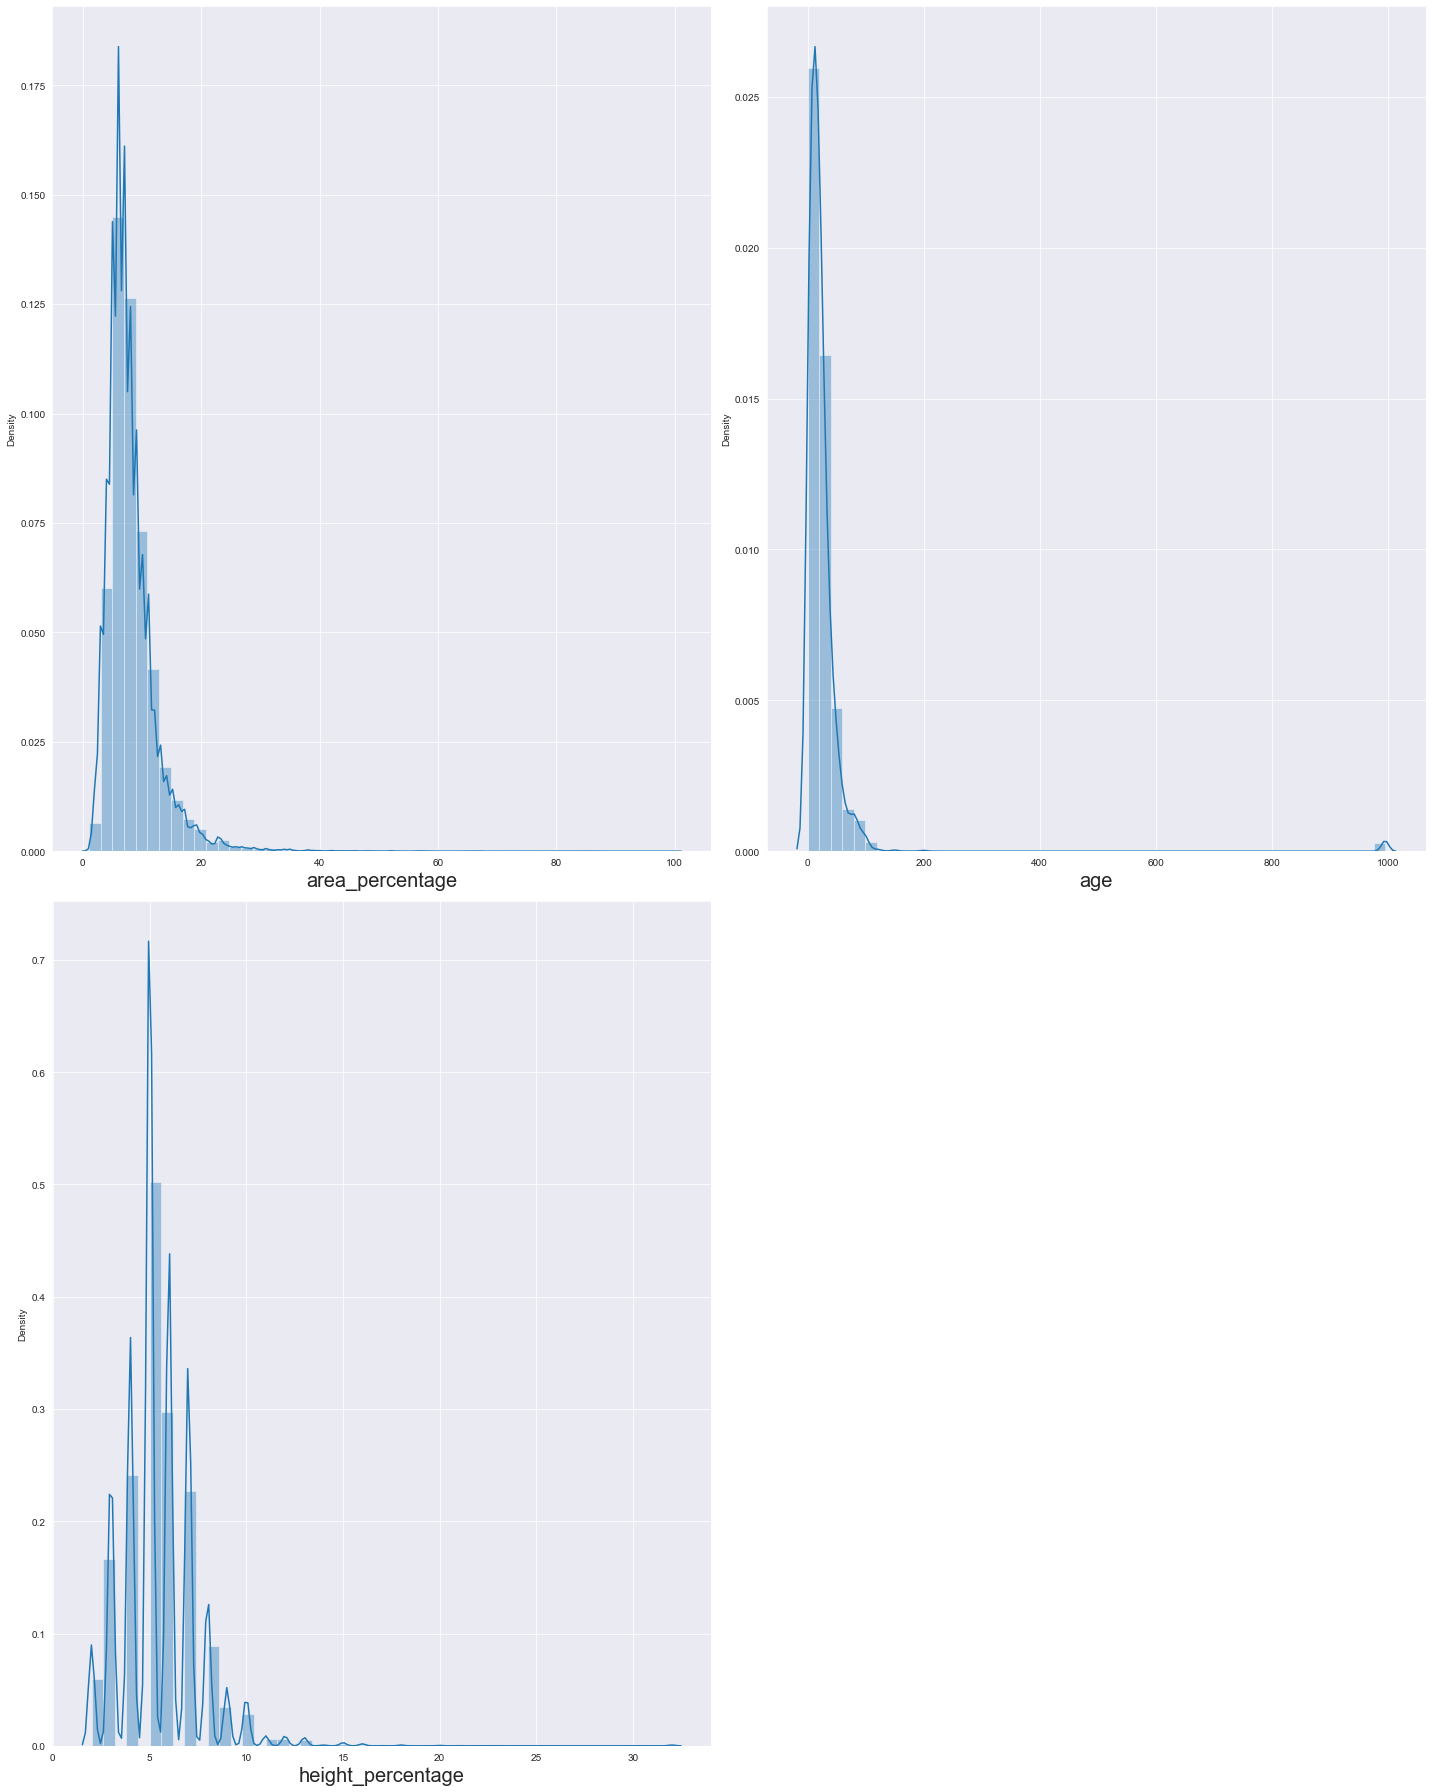

In [18]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in num_data: # iteration of columns / acessing the columns from  dataset 
    if plotno<=5:    # set the limit
        plt.subplot(2,2,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=num_data[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

*  Use IQR because of some right skewed in data.

### 1. area_percentage.

In [19]:

# Step:1 
from scipy import stats
iqr = stats.iqr(data['area_percentage'],interpolation='midpoint')
print("IQR",iqr)
/
# step:2
Q1 = data['area_percentage'].quantile(0.25)  # first quantile
Q3 = data['area_percentage'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 4.0
minimum limit -1.0
maximum limit 15.0


In [20]:
# get the percentage
len(data.loc[data['area_percentage'] > max_limit])/260601*100

5.202205670738024

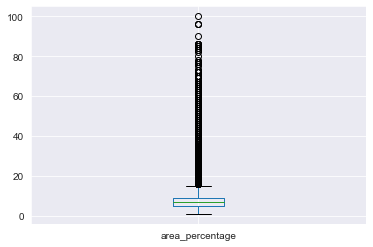

In [21]:
data.boxplot('area_percentage')
plt.show()

In [22]:
# impute outlier both side
data.loc[data['area_percentage'] > max_limit,'area_percentage'] = data['area_percentage'].median()

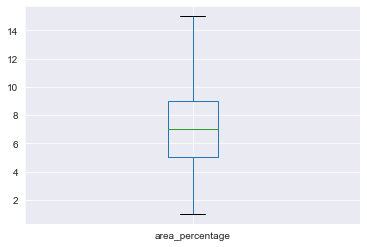

In [23]:
data.boxplot('area_percentage')
plt.show()

### 2. age

In [24]:
# Step:1 
from scipy import stats
iqr = stats.iqr(data['age'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['age'].quantile(0.25)  # first quantile
Q3 = data['age'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 20.0
minimum limit -20.0
maximum limit 60.0


In [25]:
# get the percentage
len(data.loc[data['age'] > max_limit])/260601*100

4.796221042896995

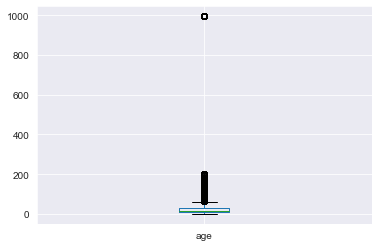

In [26]:
data.boxplot('age')
plt.show()

In [27]:
# impute outlier both side
data.loc[data['age'] > max_limit,'age'] = data['age'].median()

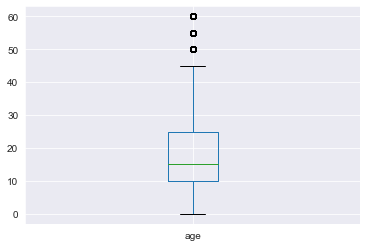

In [28]:
data.boxplot('age')
plt.show()

### 3.height_percentage.

In [29]:
# Step:1 
from scipy import stats
iqr = stats.iqr(data['height_percentage'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = data['height_percentage'].quantile(0.25)  # first quantile
Q3 = data['height_percentage'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)

IQR 2.0
minimum limit 1.0
maximum limit 9.0


In [30]:
# get the percentage
len(data.loc[data['height_percentage'] > max_limit])/260601*100

3.0095816976911065

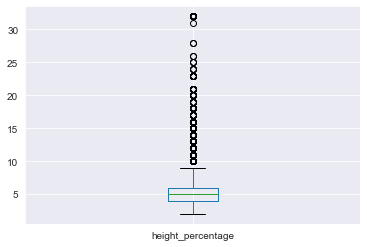

In [31]:
data.boxplot('height_percentage')
plt.show()

In [32]:
# impute outlier both side
data.loc[data['height_percentage'] > max_limit,'height_percentage'] = data['height_percentage'].median()

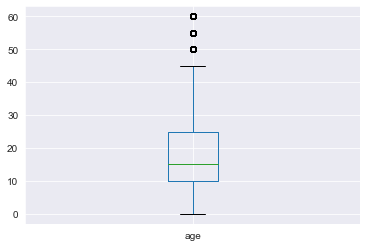

In [33]:
data.boxplot('age')
plt.show()

### CHECKING DISTRIBUTION AFTER IMPUTE OUTLIER

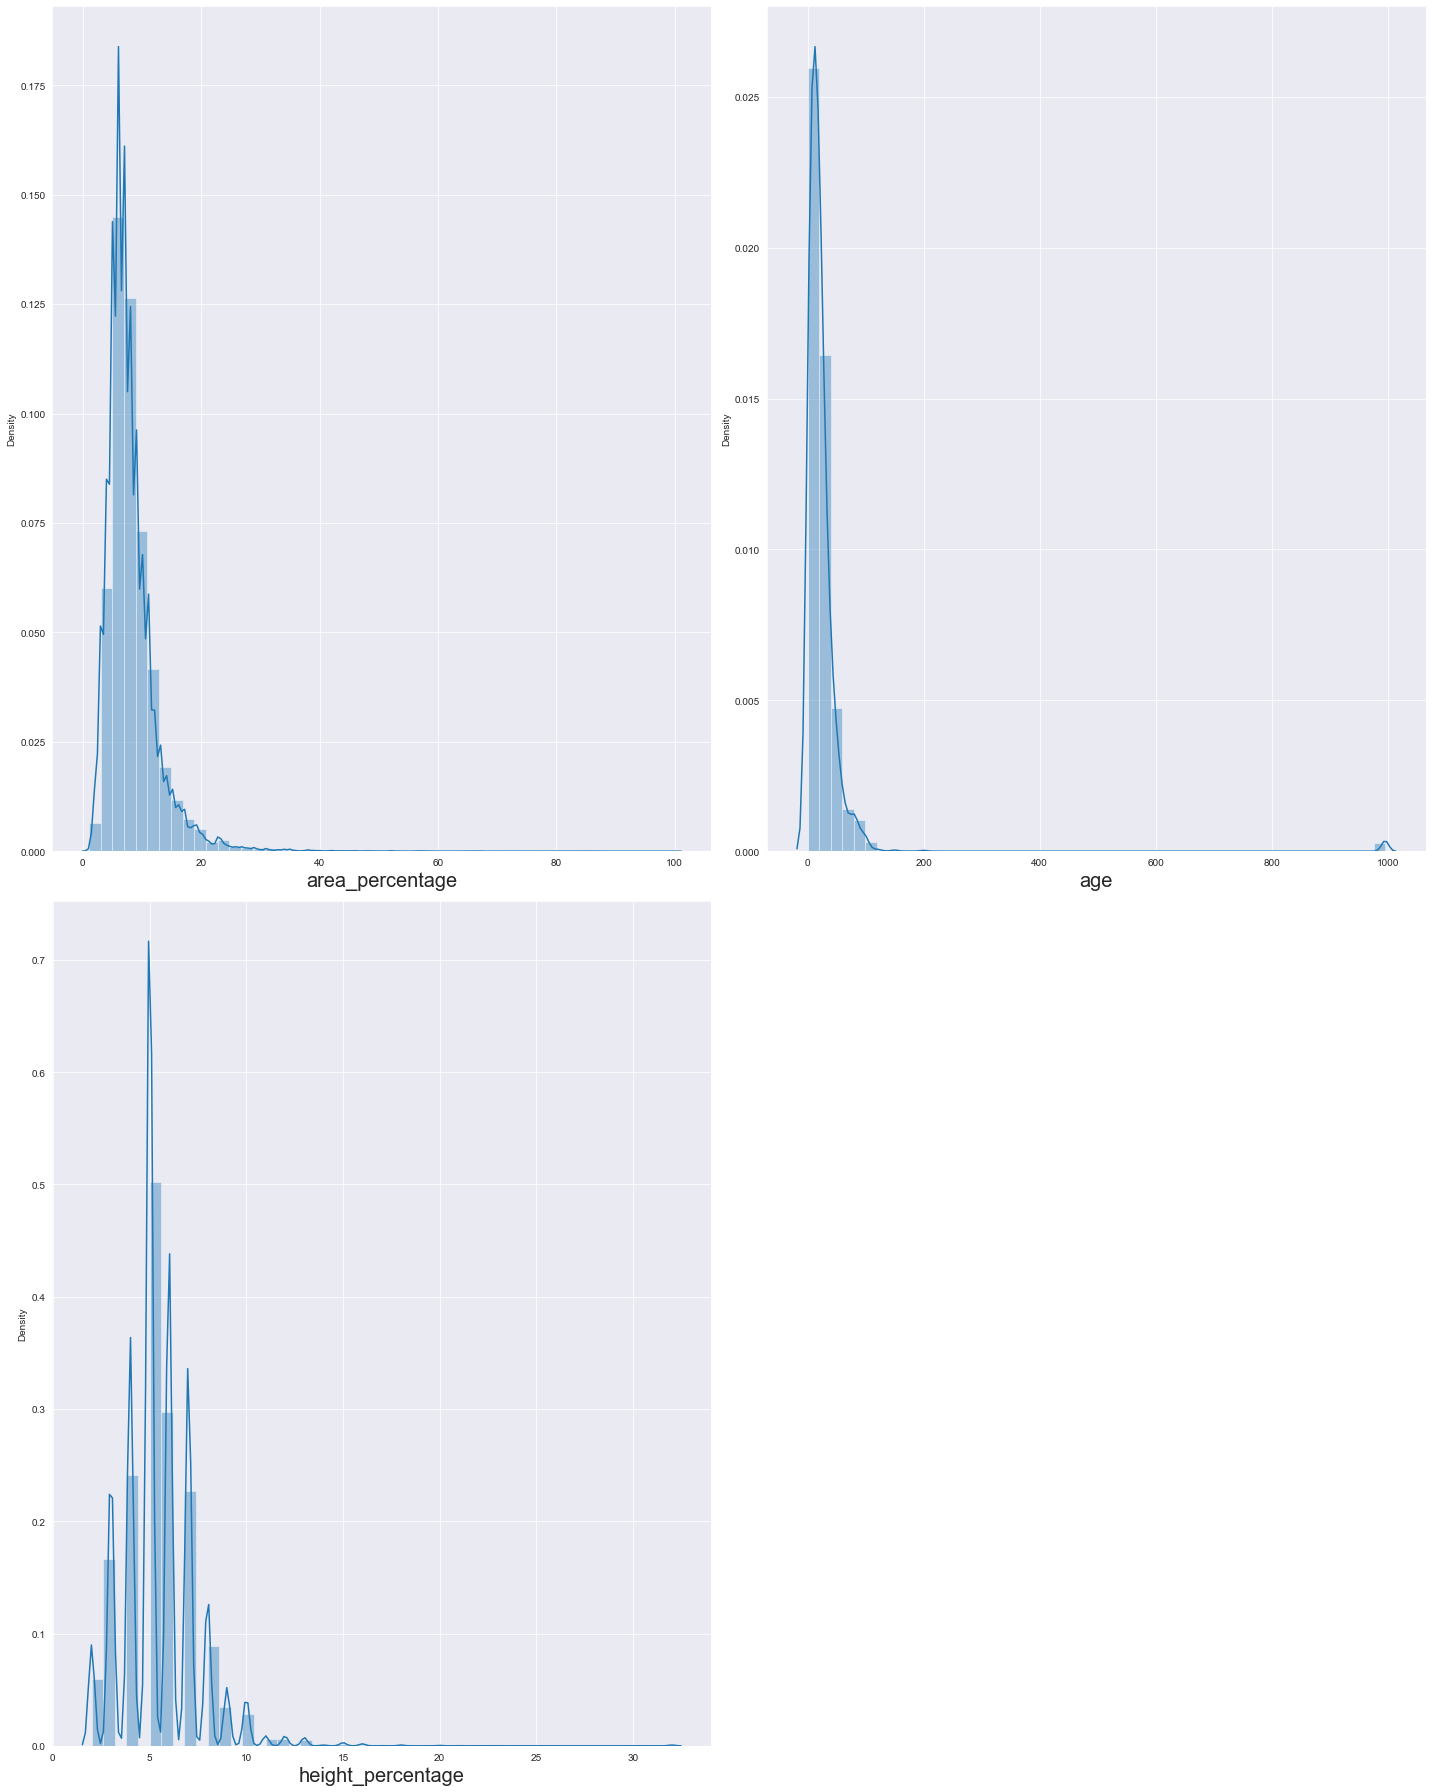

In [34]:
plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in num_data: # iteration of columns / acessing the columns from  dataset 
    if plotno<=5:    # set the limit
        plt.subplot(2,2,plotno) # # plotting 13 graphs (5-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=num_data[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

## SCALING THE DATA : -
  

##### Standard Scaling:- 
  
  *       StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

In [37]:
# 1. standard scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other','count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']]=scale.fit_transform(data[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage','has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other','count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']])


In [38]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id,damage_grade
0,802906,-0.983414,-0.518705,1.629055,-0.178274,0.848872,-0.478336,-0.15813,2,2,0,0,1,3,2,3.206391,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,-0.585029,-0.304811,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731,802906,3
1,28830,-0.734459,0.481998,-0.945017,-0.178274,-0.607111,0.261917,1.14957,1,2,0,3,1,2,2,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,-0.585029,-0.304811,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731,28830,2
2,94947,0.883744,-0.819158,0.744612,-0.178274,-0.607111,-0.848463,-0.15813,2,2,0,0,3,3,2,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,-0.585029,-0.304811,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731,94947,3
3,590882,1.008221,-0.685893,1.216589,-0.178274,-0.607111,-0.478336,-0.15813,2,2,0,0,3,2,2,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,1.709316,3.280725,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731,590882,2
4,201944,-0.361028,-1.381296,-1.308119,1.195989,0.848872,0.261917,2.45727,2,2,0,0,3,2,2,3.206391,-1.789003,-0.188554,-0.136284,-0.270442,-0.285298,-0.585029,-0.304811,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731,201944,3


## FEATURE SELECTION

### DROP UNIQUE AND CONTANT FEATURES

In [39]:
data.drop(['building_id'],axis=1,inplace=True)


In [40]:
data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,-0.983414,-0.518705,1.629055,-0.178274,0.848872,-0.478336,-0.15813,2,2,0,0,1,3,2,3.206391,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,-0.585029,-0.304811,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731,3
1,-0.734459,0.481998,-0.945017,-0.178274,-0.607111,0.261917,1.14957,1,2,0,3,1,2,2,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,-0.585029,-0.304811,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731,2
2,0.883744,-0.819158,0.744612,-0.178274,-0.607111,-0.848463,-0.15813,2,2,0,0,3,3,2,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,-0.585029,-0.304811,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731,3
3,1.008221,-0.685893,1.216589,-0.178274,-0.607111,-0.478336,-0.15813,2,2,0,0,3,2,2,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,1.709316,3.280725,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731,2
4,-0.361028,-1.381296,-1.308119,1.195989,0.848872,0.261917,2.45727,2,2,0,0,3,2,2,3.206391,-1.789003,-0.188554,-0.136284,-0.270442,-0.285298,-0.585029,-0.304811,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731,3


### CHECKING CORELATION:- 
  ##### Heatmap: 
   *    A heatmap is a graphical representation of data that uses a system of color-coding to represent different values


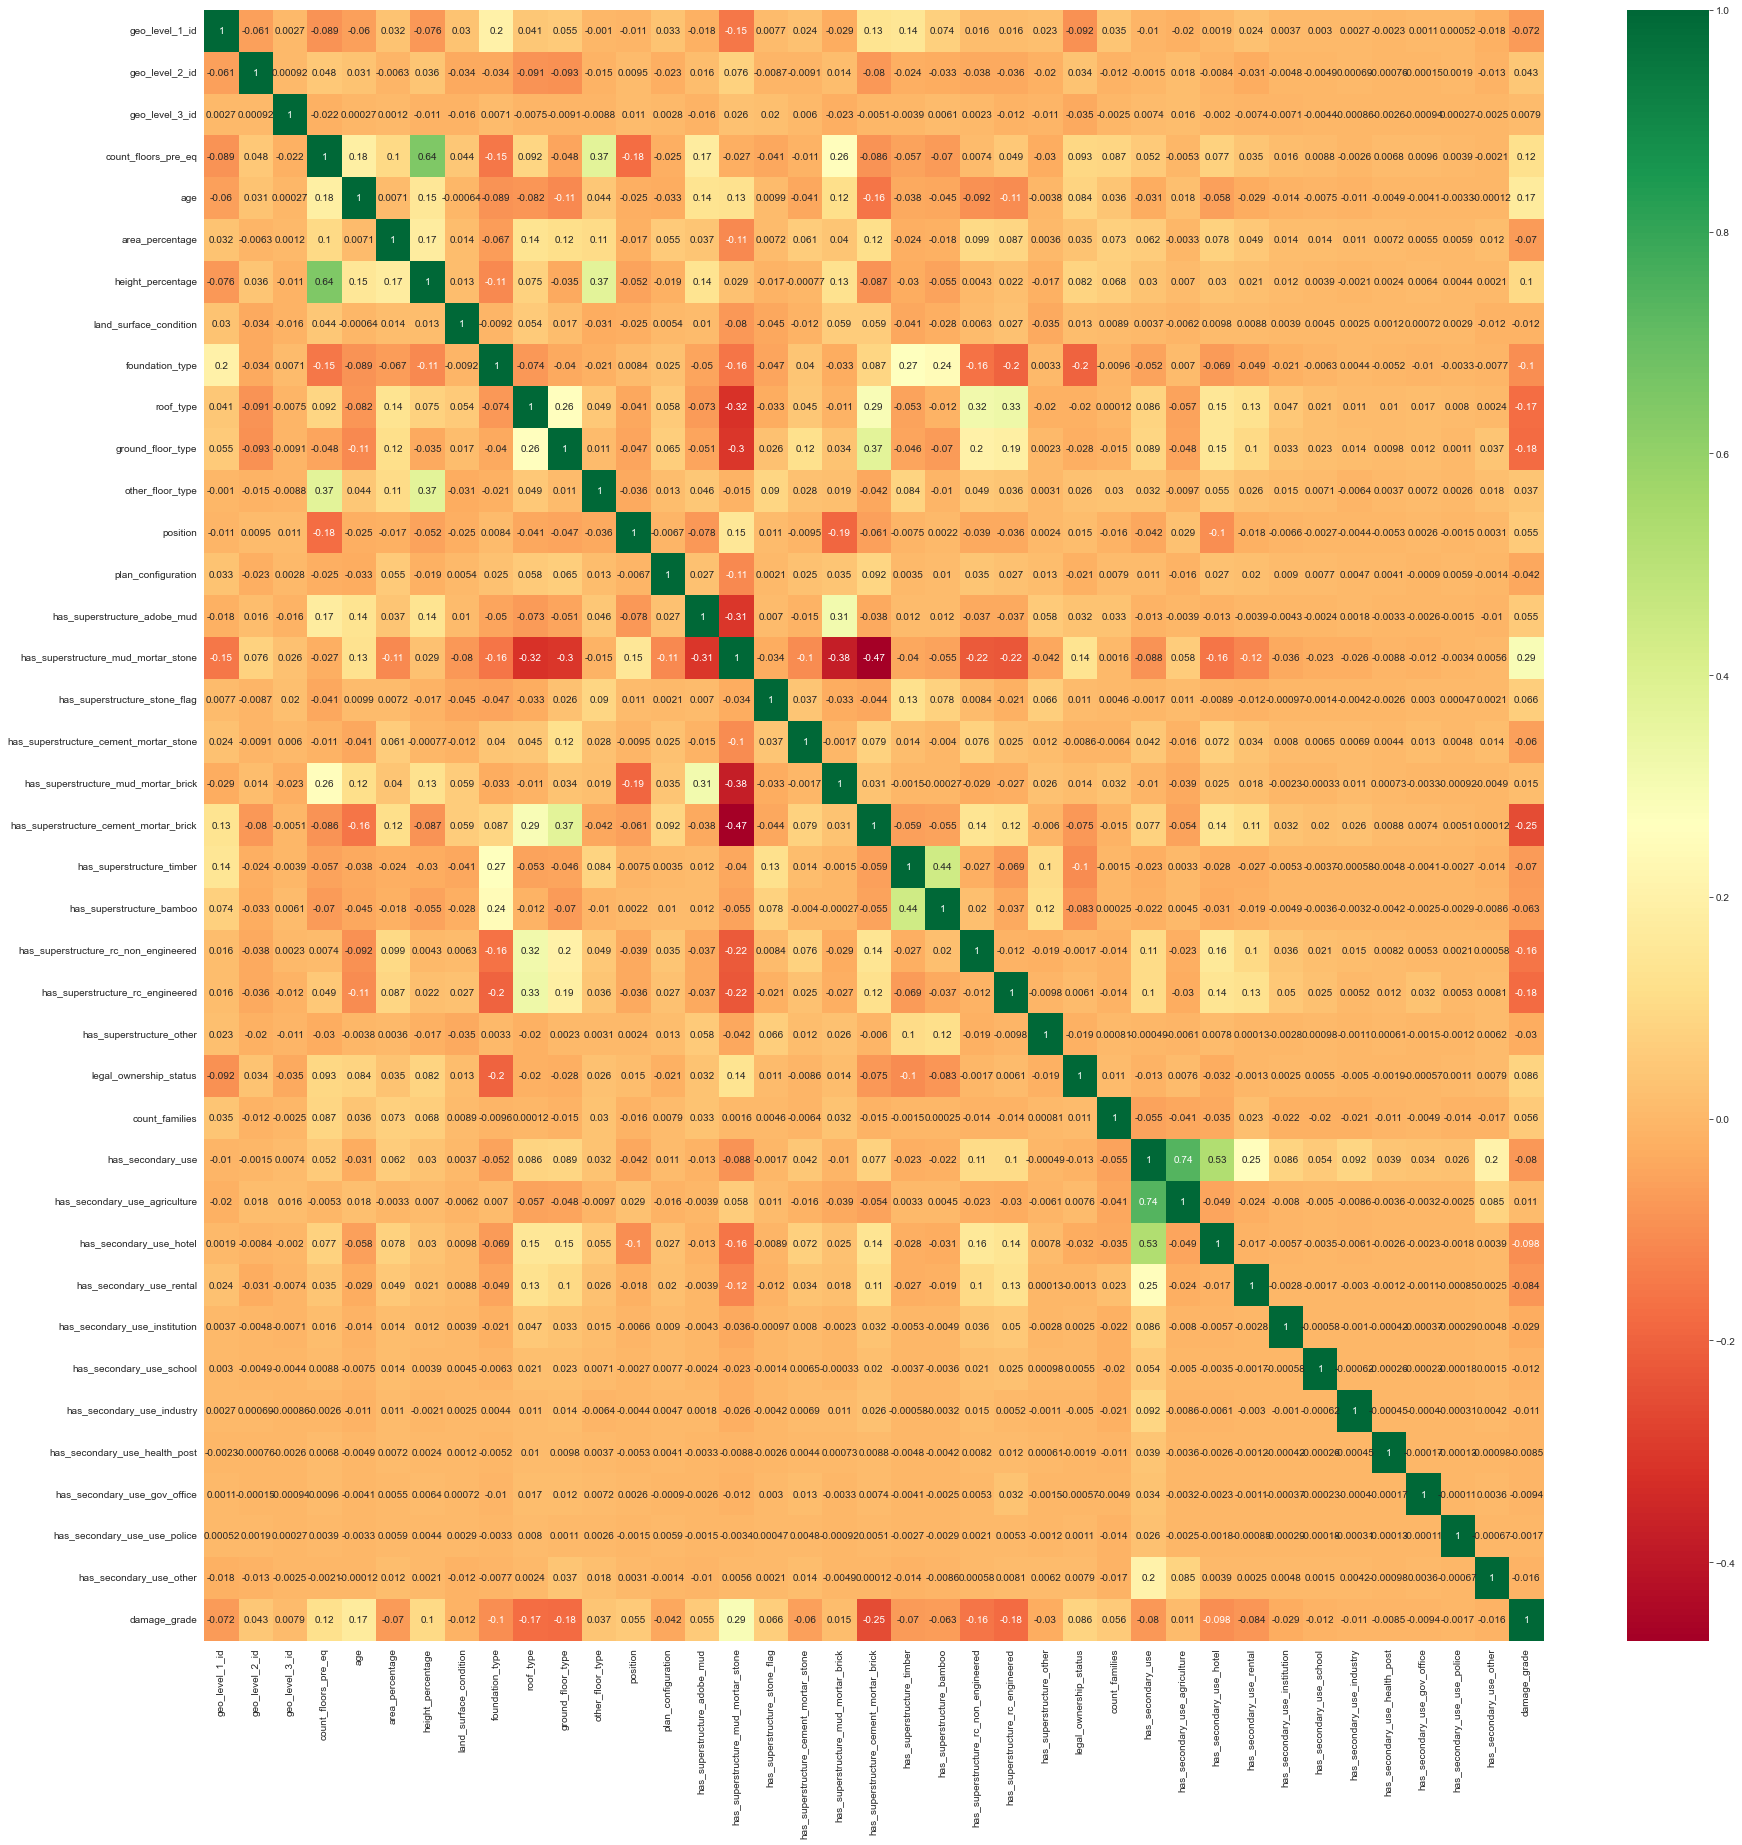

In [41]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

*   From above heatmap scale we are clearly seen the their is no highly correlated feature in data

*   But we confirm with the help of simple code

In [42]:
 #To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


*   Now we confirm their is no highly correlated feature is present.

### CHECKING DUPLICATES

In [43]:
data.duplicated().sum()

13492

In [44]:
data =data.drop_duplicates()

In [45]:
data.duplicated().sum()

0

## BALANCING THE TARGET FEATURE

In [46]:
X = data.iloc[:,:-1]
y = data.damage_grade

### Checking for Imbalance data

In [1]:
y.value_counts(normalize=True)*100

NameError: name 'y' is not defined

* The data is imbalanced. If we continue use this data,it will lead to bias the output. so we have to balance the data.

In [47]:
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,-0.983414,-0.518705,1.629055,-0.178274,0.848872,-0.478336,-0.15813,2,2,0,0,1,3,2,3.206391,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,-0.585029,-0.304811,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
1,-0.734459,0.481998,-0.945017,-0.178274,-0.607111,0.261917,1.14957,1,2,0,3,1,2,2,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,-0.585029,-0.304811,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
2,0.883744,-0.819158,0.744612,-0.178274,-0.607111,-0.848463,-0.15813,2,2,0,0,3,3,2,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,-0.585029,-0.304811,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
3,1.008221,-0.685893,1.216589,-0.178274,-0.607111,-0.478336,-0.15813,2,2,0,0,3,2,2,-0.311877,0.558971,-0.188554,-0.136284,-0.270442,-0.285298,1.709316,3.280725,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731
4,-0.361028,-1.381296,-1.308119,1.195989,0.848872,0.261917,2.45727,2,2,0,0,3,2,2,3.206391,-1.789003,-0.188554,-0.136284,-0.270442,-0.285298,-0.585029,-0.304811,-0.210914,-0.126945,-0.123339,2,0.038365,-0.354928,-0.262312,-0.186537,-0.09037,-0.030676,-0.018996,-0.032738,-0.013714,-0.012076,-0.009395,-0.071731


### Handling Imbalanced data

* Converting Imbalance data into balanced data.

* Balancing data with SMOTE Technique gives more number of NaN values so, we use RandomOverSampler Technique to balance the data

In [48]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({2: 140841, 3: 81987, 1: 24281})
balanced data:    : Counter({3: 140841, 2: 140841, 1: 140841})


### CREATING TRAINING AND TESTING DATA

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [50]:
# check the shape of X train, y train, X test and y test
X_train.shape

(197687, 38)

In [51]:
X_test.shape

(49422, 38)

In [53]:
y_train.shape

(197687,)

In [52]:
y_test.shape

(49422,)

## Model Building :-

*  In this section the following predictive models will be built:

     1. Logisticregression
     2. Decision Tree Classifier
     3. Random Forest Classifier
     4. K-Nearest Neighbors 
     5. XGBClassifie
     


   The aim is to identify the model which best predicts the damage grade on new data given the input features. Within this section, a pre-processing pipeline will be set up to prepare the data for training. A test dataset will be extracted from the main data to give us the opportunity to assess how the models perform on completely new data. The models will be evaluated on the test data using the evaulation metric F1.

## 1. Logisticregression :-

In [56]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log_model = LogisticRegression(multi_class='ovr')

# Step:3 Fitting the training data
log_model.fit(X_train,y_train)

# Step:4 Prediction on test data
y_log_predict = log_model.predict(X_test)

# Step:5 Prediction on training data
train_log_predict = log_model.predict(X_train)

### EVALUATION

### TRAINING ACCURACY

In [57]:
# importing library
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report,accuracy_score
log_train_accuracy = accuracy_score(train_log_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(train_log_predict,y_train))

Training accuracy of Logistic regression model 58.44795054808864
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           1       0.24      0.61      0.34      7694
           2       0.93      0.59      0.72    178788
           3       0.09      0.53      0.15     11205

    accuracy                           0.58    197687
   macro avg       0.42      0.57      0.41    197687
weighted avg       0.86      0.58      0.67    197687



### TESTING ACCURACY

In [58]:
log_test_accuracy = accuracy_score(y_log_predict,y_test)
print("Testing accuracy ogof Logistic regession model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(y_log_predict,y_test))

Testing accuracy ogof Logistic regession model 57.996438832908424
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           1       0.24      0.60      0.34      1902
           2       0.93      0.58      0.72     44607
           3       0.09      0.53      0.16      2913

    accuracy                           0.58     49422
   macro avg       0.42      0.57      0.40     49422
weighted avg       0.85      0.58      0.67     49422



In [59]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report,accuracy_score
recall_log = recall_score(y_log_predict,y_test,average='weighted')
recall_log*100

57.996438832908424

## 2. Decision Tree Classifier :-

In [54]:
#Decision Tree
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)

model = dt.fit(X_train, y_train)


#Predictions - Decision Tree

model.predict(X_test)

print("Decision Tree")
print("Training Score: {}".format(dt.score(X_train, y_train)))
print("Test Score: {}".format(dt.score(X_test, y_test)))
print("----------------------------------------")


Decision Tree
Training Score: 0.7391988345212381
Test Score: 0.7069726032940795
----------------------------------------


## 3. Random Forest Classifier :-

In [55]:
#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)

model = rf.fit(X_train, y_train)


#Predictions - Decision Tree

model.predict(X_test)

print("Random Forest")

print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))

Random Forest
Training Score: 0.7458861735976569
Test Score: 0.7205495528307232


## 4. K-Nearest Neighbors :-

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

### Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [53]:
## Error calculation for regression task
# Donot run this code on current dataset
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(5):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.6861504766666281
RMSE value for k=  2 is: 0.5958092555623817
RMSE value for k=  3 is: 0.56440153631574
RMSE value for k=  4 is: 0.5499086179377721
RMSE value for k=  5 is: 0.5414635657993051


In [54]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [55]:
# Predict 
y_pred = knn.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report,accuracy_score

In [57]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.6211808506333212


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.48      0.50      0.49      4871
           2       0.65      0.78      0.71     27966
           3       0.61      0.39      0.48     16585

    accuracy                           0.62     49422
   macro avg       0.58      0.56      0.56     49422
weighted avg       0.62      0.62      0.61     49422



# 5. XGBClassifie :-

In [ ]:
!pip install xgboost==0.90

In [60]:
# Step:1 import library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Step:2 Fitting the training data
xgb.fit(X_train,y_train)

# Step:3 Prediction on training data
xgb_train_predict = xgb.predict(X_train)

# Step:4 Prediction on testing data
xgb_test_predict = xgb.predict(X_test)

### EVALUATION

### TRAINING ACCURACY

In [61]:
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
print("Training accuracy of xgb model",xgb_train_accuracy)
print("Classifiaction report on training: \n",classification_report(xgb_train_predict,y_train))

Training accuracy of xgb model 0.6712176319130747
Classifiaction report on training: 
               precision    recall  f1-score   support

           1       0.35      0.63      0.45     10685
           2       0.88      0.66      0.75    150085
           3       0.41      0.73      0.52     36917

    accuracy                           0.67    197687
   macro avg       0.55      0.67      0.58    197687
weighted avg       0.76      0.67      0.69    197687



### TESTING ACCURACY

In [62]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy of xgb model",xgb_test_accuracy*100)
print("Classification report on testing: \n",classification_report(xgb_test_predict,y_test))

Testing accuracy of xgb model 67.05718101250456
Classification report on testing: 
               precision    recall  f1-score   support

           1       0.34      0.63      0.44      2633
           2       0.88      0.66      0.75     37380
           3       0.42      0.73      0.53      9409

    accuracy                           0.67     49422
   macro avg       0.54      0.67      0.57     49422
weighted avg       0.76      0.67      0.69     49422



In [63]:
xgb_recall_score = recall_score(xgb_test_predict,y_test,average='weighted')
print("Recall score:",xgb_recall_score*100)

Recall score: 67.05718101250456


## Conclusion
*       I have tried LogisticRegression, Decision Tree , Random forest, KNN, XGBClassifie.
        The Random Forest and Decision Tree gives best Accuracy with respect to  72.05 and 70.69  score.
        So, Random forest classifier is the best model for this Earth quake multi class classification dataset.